# Introduzione - Exploration Data Analysis

EDA (Exploratory Data Analysis) è una metodologia utilizzata nell'ambito dell'analisi dei dati per comprendere, visualizzare e analizzare i dati al fine di ottenere informazioni utili e trarre conclusioni significative. Per una ricerca più precisa coinvolge il calcolo di statistiche descrittive come media, mediana, deviazione standard e quantili per ottenere una panoramica generale dei dati.

L'EDA è spesso il primo passo fondamentale nell'analisi dei dati e può fornire una solida base per decisioni informative sul processo di analisi successivo, inclusa l'applicazione di modelli statistici o algoritmi di machine learning per fare previsioni o prendere decisioni basate sui dati.

Gli obiettivi principali dell'EDA includono:

1. Individuare pattern: tendenze o relazioni attraverso grafici a dispersione, istogrammi e altre forme di rappresentazione.

2. Rilevare anomalie: dati anomali o valori aberranti che potrebbero influenzare negativamente l'analisi o i risultati.

3. Verificare assunzioni: validare le ipotesi.

4. Selezionare le variabili rilevanti: variabili o caratteristiche più significative per l'analisi successiva.

5. Ottenere intuizioni: intuizioni preziose che possono guidare ulteriori analisi.

Ecco alcune applicazioni dell'EDA nello studio degli antibiotici:

- Analisi dei pattern di utilizzo: L'EDA può essere utilizzata per esaminare i dati sull'utilizzo degli antibiotici, come le prescrizioni, le dosi somministrate, la durata dei trattamenti e le modalità di somministrazione. Ciò consente di identificare pattern di utilizzo, come l'incidenza di prescrizioni inappropriate o eccessive, l'uso di antibiotici a spettro ampio senza indicazione precisa o l'aderenza alle linee guida cliniche.

- Monitoraggio delle resistenze batteriche: L'EDA può aiutare a esaminare i dati sulla resistenza batterica agli antibiotici, come i risultati dei test di sensibilità antimicrobica. Attraverso l'analisi, è possibile individuare trend temporali o geografici nell'incidenza delle resistenze, identificare batteri o classi di antibiotici con un alto livello di resistenza e valutare l'efficacia delle strategie di controllo delle infezioni.

- Esplorazione delle relazioni tra antibiotici e outcomes: L'EDA può consentire di studiare le associazioni tra l'uso degli antibiotici e gli outcomes clinici, come l'incidenza di infezioni nosocomiali, complicanze o ricadute. Attraverso l'analisi dei dati, è possibile identificare collegamenti potenziali tra specifici antibiotici e outcomes negativi, supportando l'ottimizzazione delle terapie antibiotiche.

- Valutazione dell'impatto delle politiche di stewardship: L'EDA può essere utilizzata per valutare l'efficacia delle politiche di stewardship degli antibiotici, come le iniziative per promuovere l'uso appropriato degli antibiotici o ridurre la prescrizione eccessiva. Attraverso l'analisi dei dati, è possibile valutare il cambiamento di comportamento nel tempo, misurare l'adesione alle raccomandazioni e identificare aree di miglioramento.

# Analisi esplorativa dei dati EARS: un'indagine sui pattern di resistenza batterica in Europa

### Data Collection

Dataset scaricato dal database EARS. Ogni voce proviene da un'istituzione di segnalazione nel rispettivo paese europeo.

In [12]:
import pandas as pd

data = pd.read_csv('ecdc.csv')

print("Shape:", data.shape)

print("Colonne:", data.columns)

print("Info:")
print(data.info())

valori_nulli = data.isnull().sum()

print("Numero di valori nulli per ogni colonna:")
print(valori_nulli) 

Shape: (64386, 10)
Colonne: Index(['Unnamed: 0', 'Distribution', 'Unit', 'Time', 'RegionCode',
       'RegionName', 'Category', 'Value', 'Bacteria', 'Antibiotic'],
      dtype='object')
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64386 entries, 0 to 64385
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    64386 non-null  int64  
 1   Distribution  64386 non-null  object 
 2   Unit          64386 non-null  object 
 3   Time          64386 non-null  int64  
 4   RegionCode    64386 non-null  object 
 5   RegionName    64386 non-null  object 
 6   Category      64386 non-null  object 
 7   Value         64386 non-null  float64
 8   Bacteria      64386 non-null  object 
 9   Antibiotic    64386 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 4.9+ MB
None
Numero di valori nulli per ogni colonna:
Unnamed: 0      0
Distribution    0
Unit            0
Time            0
Reg

In [13]:
data.head(5)

,Unnamed: 0,Distribution,Unit,Time,RegionCode,RegionName,Category,Value,Bacteria,Antibiotic
0,0,"R - resistant isolates proportion, by age",%,2012,BG,Bulgaria,0-4,0.000000,Acinetobacter spp.,Aminoglycosides
1,1,"R - resistant isolates proportion, by age",%,2012,BG,Bulgaria,5-18,100.000000,Acinetobacter spp.,Aminoglycosides
2,2,"R - resistant isolates proportion, by age",%,2012,BG,Bulgaria,19-64,62.857143,Acinetobacter spp.,Aminoglycosides
3,3,"R - resistant isolates proportion, by age",%,2012,BG,Bulgaria,65+,56.521739,Acinetobacter spp.,Aminoglycosides
4,4,"R - resistant isolates proportion, by age",%,2012,CY,Cyprus,0-4,33.333333,Acinetobacter spp.,Aminoglycosides


### DESCRIZIONE DELLE COLONNE 

Unnamed: 0: sembra essere un indice aggiunto durante la creazione o il salvataggio del dataframe. Potrebbe non avere un significato utile per l'analisi e potrebbe essere rimosso.

Distribution: si riferisce a se i dati sono stati segnalati per un particolare genere o gruppo di età.

Unit: modalità in percentuale 

Time: questa colonna rappresenta l'anno, che varia da 2000 a 2018.

RegionCode, RegionName: queste colonne rappresentano codici e nomi di regioni.

Category: si riferisce al gruppo di età o al genere (a seconda della distribuzione).

Value: si riferisce alla percentuale di batteri che erano resistenti al gruppo di antibiotici.

Bacteria: rappresenta i batteri in cui è stata monitorata la resistenza.

Antibiotic: si riferisce al gruppo di antibiotici che è stato utilizzato per uccidere i batteri.

### Data Cleaning




In [14]:
# Create a copy of the original DataFrame
cleaned_data = data.copy()

#Togliere le colonne non necessarie come "Unnamed:0"
data = data.drop('Unnamed: 0', axis=1)

#Convertire in datetime colonna "Time"
data['Time'] = pd.to_datetime(data['Time'], format='%Y')

#Presenza di outliers (vedi sotto)

# Calcolare il numero di valori nulli in ogni colonna
valori_nulli = data.isnull().sum()

In [15]:
data.head()

,Distribution,Unit,Time,RegionCode,RegionName,Category,Value,Bacteria,Antibiotic
0,"R - resistant isolates proportion, by age",%,2012-01-01,BG,Bulgaria,0-4,0.000000,Acinetobacter spp.,Aminoglycosides
1,"R - resistant isolates proportion, by age",%,2012-01-01,BG,Bulgaria,5-18,100.000000,Acinetobacter spp.,Aminoglycosides
2,"R - resistant isolates proportion, by age",%,2012-01-01,BG,Bulgaria,19-64,62.857143,Acinetobacter spp.,Aminoglycosides
3,"R - resistant isolates proportion, by age",%,2012-01-01,BG,Bulgaria,65+,56.521739,Acinetobacter spp.,Aminoglycosides
4,"R - resistant isolates proportion, by age",%,2012-01-01,CY,Cyprus,0-4,33.333333,Acinetobacter spp.,Aminoglycosides


## Data Exploration: analisi preliminare dei dati. 

### Quali sono i batteri e gli antibiotici considerati?

In [16]:
# Ottieni i valori univoci per 'Bacteria'
unique_bacteria = data['Bacteria'].unique()
print("Batteri unici:")
print(unique_bacteria)

# Ottieni i valori univoci per 'Antibiotic'
unique_antibiotics = data['Antibiotic'].unique()
print("Antibiotici unici:")
print(unique_antibiotics)



Batteri unici:
['Acinetobacter spp.' 'Enterococcus faecalis' 'Enterococcus faecium'
 'Escherichia coli' 'Klebsiella pneumoniae' 'Pseudomonas aeruginosa'
 'Staphylococcus aureus' 'Streptococcus pneumoniae']
Antibiotici unici:
['Aminoglycosides' 'Carbapenems'
 'Combined resistance (fluoroquinolones, aminoglycosides and carbapenems)'
 'Fluoroquinolones' 'Aminopenicillins' 'High-level gentamicin'
 'Vancomycin'
 'Combined resistance (third-generation cephalosporin, fluoroquinolones and aminoglycoside)'
 'Third-generation cephalosporins' 'Ceftazidime'
 'Combined resistance (at least three of piperac. and tazob., fluoroq., ceftaz., aminogl. and carbapenems)'
 'PiperacillinTazobactam' 'Meticillin (MRSA)' 'Macrolides' 'Penicillins']


### Quale antibiotico è stato usato per ogni batterio? E' da considerarsi efficiente? 

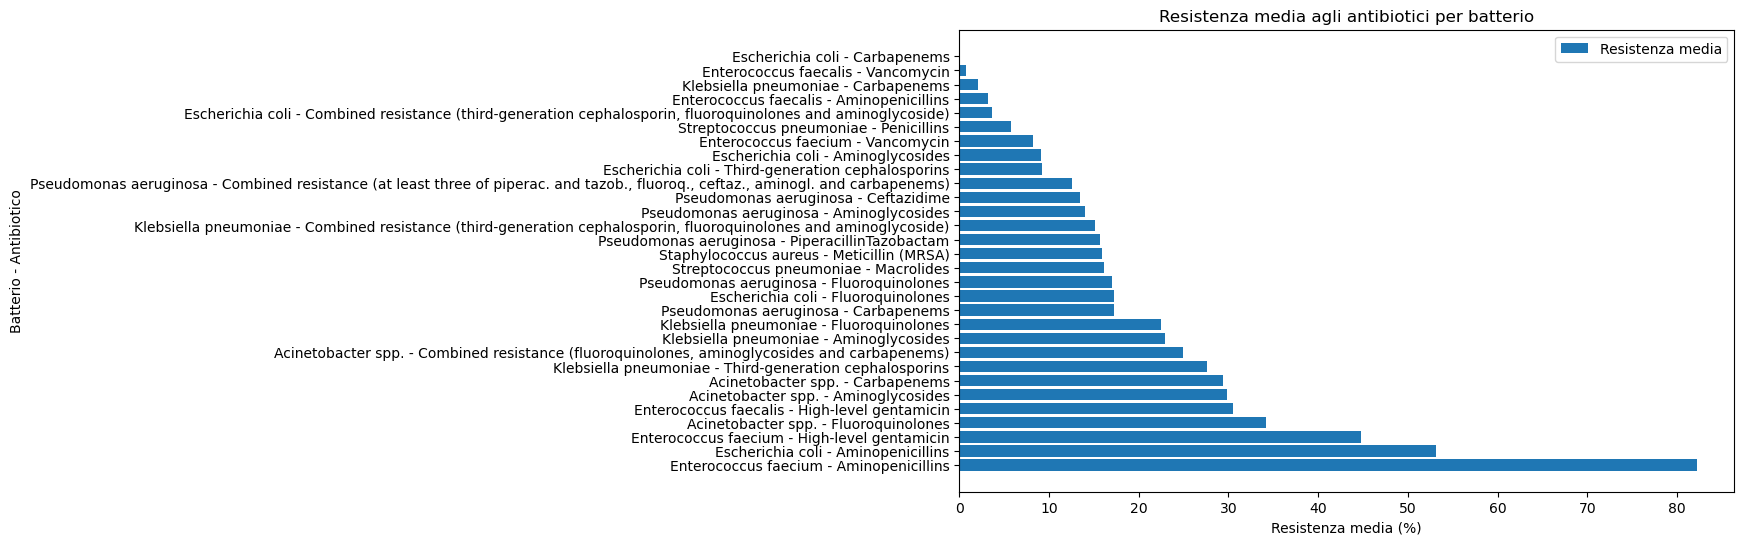

In [17]:
import matplotlib.pyplot as plt

# Raggruppa per 'Bacteria' e 'Antibiotic' e calcola la media di 'Value'
grouped = data.groupby(['Bacteria', 'Antibiotic'])['Value'].mean().reset_index()

# Ordina i risultati in ordine decrescente di 'Value'
grouped = grouped.sort_values('Value', ascending=False)

# Visualizza i risultati con un grafico a barre
plt.figure(figsize=(10, 6))
plt.barh(grouped['Bacteria'] + ' - ' + grouped['Antibiotic'], grouped['Value'])
plt.xlabel('Resistenza media (%)')
plt.ylabel('Batterio - Antibiotico')
plt.title('Resistenza media agli antibiotici per batterio')
plt.legend(['Resistenza media'])
plt.show()



### Ordinamento in base all'efficienza dell'antibiotico

In questo modo è ancora più evidente quali siano le coppie di batteri-antibiotico più preoccupanti e quali invece al momento possono essere trattati con l'antibiotico corrispondente. 



In [18]:
resistance_grouped_sorted = data.groupby(['Bacteria', 'Antibiotic']).agg({'Value': 'mean'}).reset_index()
resistance_grouped_sorted = resistance_grouped_sorted.rename(columns={'Value': 'mean'})
resistance_grouped_sorted = resistance_grouped_sorted.sort_values(by='mean')

resistance_grouped_sorted


,Bacteria,Antibiotic,mean
12,Escherichia coli,Carbapenems,0.107307
6,Enterococcus faecalis,Vancomycin,0.703540
17,Klebsiella pneumoniae,Carbapenems,2.071340
4,Enterococcus faecalis,Aminopenicillins,3.150801
13,Escherichia coli,Combined resistance (third-generation cephalos...,3.620842
29,Streptococcus pneumoniae,Penicillins,5.743974
9,Enterococcus faecium,Vancomycin,8.177164
10,Escherichia coli,Aminoglycosides,9.149124
15,Escherichia coli,Third-generation cephalosporins,9.245141
24,Pseudomonas aeruginosa,Combined resistance (at least three of piperac...,12.536102


### Osservazioni sul comportamento della resistenza

Da questo campione possiamo dedurre che alcuni ceppi di batteri, come "Enterococcus faecium" rispetto agli aminopenicilline, hanno livelli di resistenza molto elevati (in media 82.26%, con una mediana del 88.38%). Ciò indica che l'efficacia delle aminopenicilline contro Enterococcus faecium è generalmente bassa.
Altri ceppi, come "Escherichia coli" rispetto ai carbapenemi, mostrano livelli di resistenza molto bassi (in media 0.11%, con una mediana di 0%). Questo indica che i carbapenemi sono generalmente molto efficaci contro Escherichia coli.
La resistenza varia non solo tra i diversi ceppi di batteri, ma anche tra i diversi antibiotici. Ad esempio, "Acinetobacter spp." ha un livello di resistenza medio più alto alle fluoroquinoloni (34.24%) rispetto ai carbapenemi (29.34%).

### Distribuzione di resistenza per ciascuna coppia di batterio-antibiotico.

In [19]:
resistance_grouped = data.groupby(['Bacteria', 'Antibiotic'])['Value'].agg(['mean','min', 'max', 'median']).reset_index()
resistance_grouped

#min e max sono sempre min = 0 e max = 100
#ad esclusione della coppia Escherichia coli- Aminopenicillins, per i quali il valore minimo di resistenza è 5.882353 e il valore massimo è	90.000000
#mean e mediana 

,Bacteria,Antibiotic,mean,min,max,median
0,Acinetobacter spp.,Aminoglycosides,29.875082,0.000000,100.000000,11.620395
1,Acinetobacter spp.,Carbapenems,29.343503,0.000000,100.000000,8.108108
2,Acinetobacter spp.,"Combined resistance (fluoroquinolones, aminogl...",24.943081,0.000000,100.000000,6.250000
3,Acinetobacter spp.,Fluoroquinolones,34.235005,0.000000,100.000000,15.789474
4,Enterococcus faecalis,Aminopenicillins,3.150801,0.000000,100.000000,0.277778
5,Enterococcus faecalis,High-level gentamicin,30.555649,0.000000,100.000000,31.034483
6,Enterococcus faecalis,Vancomycin,0.703540,0.000000,100.000000,0.000000
7,Enterococcus faecium,Aminopenicillins,82.265742,0.000000,100.000000,88.388348
8,Enterococcus faecium,High-level gentamicin,44.819155,0.000000,100.000000,45.918367
9,Enterococcus faecium,Vancomycin,8.177164,0.000000,100.000000,1.017380


### Considerazioni: 
Nel dataset vediamo per esempio che per "Enterococcus faecium" e "Aminopenicillins" la media e la mediana sono molto vicine (82.26 e 88.39 rispettivamente), indicando una distribuzione probabilmente simmetrica dei dati. Al contrario, per "Acinetobacter spp." e "Aminoglycosides" la media è 29.87 mentre la mediana è solo 11.62, suggerendo una distribuzione asimmetrica con la presenza di valori alti che aumentano la media. Altre coppie di batteri e antibiotici con distribuzione asimmetrica si possono trovare facendo la differenza fra la media e la mediana.

Per trovare il valore discriminante migliore, è possibile eseguire un'analisi esplorativa dei dati calcolando la distribuzione della differenza tra media e mediana e valutando quale valore potrebbe essere un buon criterio di discriminazione.

Valore discriminante: 1
Numero di righe selezionate: 26
-----------------------------
Valore discriminante: 5
Numero di righe selezionate: 12
-----------------------------
Valore discriminante: 10
Numero di righe selezionate: 4
-----------------------------
Valore discriminante: 15
Numero di righe selezionate: 4
-----------------------------
Valore discriminante: 20
Numero di righe selezionate: 1
-----------------------------
Valore discriminante: 25
Numero di righe selezionate: 0
-----------------------------
Valore discriminante: 30
Numero di righe selezionate: 0
-----------------------------


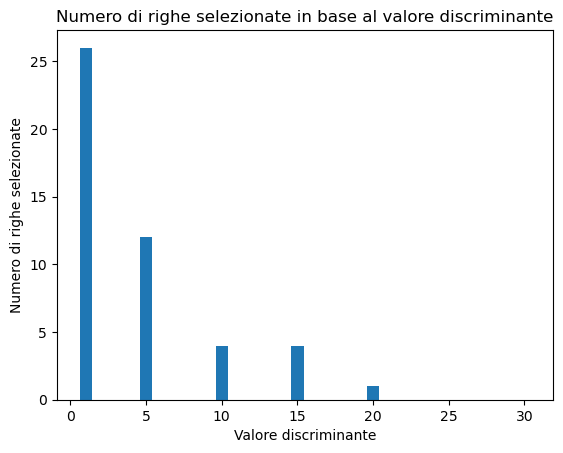

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supponendo che "resistance_grouped" sia il tuo DataFrame

# Calcolo della differenza tra media e mediana
resistance_grouped['diff'] = abs(resistance_grouped['mean'] - resistance_grouped['median'])

# Dati del grafico
thresholds = [1, 5, 10, 15, 20, 25, 30]
num_rows_selected = []

for threshold in thresholds:
    filtered_data = resistance_grouped[resistance_grouped['diff'] > threshold]
    num_rows_selected.append(len(filtered_data))
    print(f"Valore discriminante: {threshold}")
    print(f"Numero di righe selezionate: {len(filtered_data)}")
    print("-----------------------------")

# Creazione del grafico a barre
plt.bar(thresholds, num_rows_selected)
plt.xlabel('Valore discriminante')
plt.ylabel('Numero di righe selezionate')
plt.title('Numero di righe selezionate in base al valore discriminante')
plt.show()



In [21]:
# Filtraggio dei dati con una grande differenza tra media e mediana
filtered_data = resistance_grouped[resistance_grouped['diff'] > 5] #Consideriamo 5 come valore discriminante  

# Visualizzazione dei risultati
filtered_data


,Bacteria,Antibiotic,mean,min,max,median,diff
0,Acinetobacter spp.,Aminoglycosides,29.875082,0.0,100.0,11.620395,18.254687
1,Acinetobacter spp.,Carbapenems,29.343503,0.0,100.0,8.108108,21.235395
2,Acinetobacter spp.,"Combined resistance (fluoroquinolones, aminogl...",24.943081,0.0,100.0,6.250000,18.693081
3,Acinetobacter spp.,Fluoroquinolones,34.235005,0.0,100.0,15.789474,18.445532
7,Enterococcus faecium,Aminopenicillins,82.265742,0.0,100.0,88.388348,6.122606
9,Enterococcus faecium,Vancomycin,8.177164,0.0,100.0,1.017380,7.159783
16,Klebsiella pneumoniae,Aminoglycosides,22.906352,0.0,100.0,15.384615,7.521737
18,Klebsiella pneumoniae,Combined resistance (third-generation cephalos...,15.129822,0.0,100.0,7.692308,7.437515
19,Klebsiella pneumoniae,Fluoroquinolones,22.469715,0.0,100.0,16.666667,5.803048
20,Klebsiella pneumoniae,Third-generation cephalosporins,27.605112,0.0,100.0,20.754717,6.850395


### Presenza di outliers?


### Calcolare l'asimmetria (skewness) dei dati per ogni coppia di batterio e antibiotico.

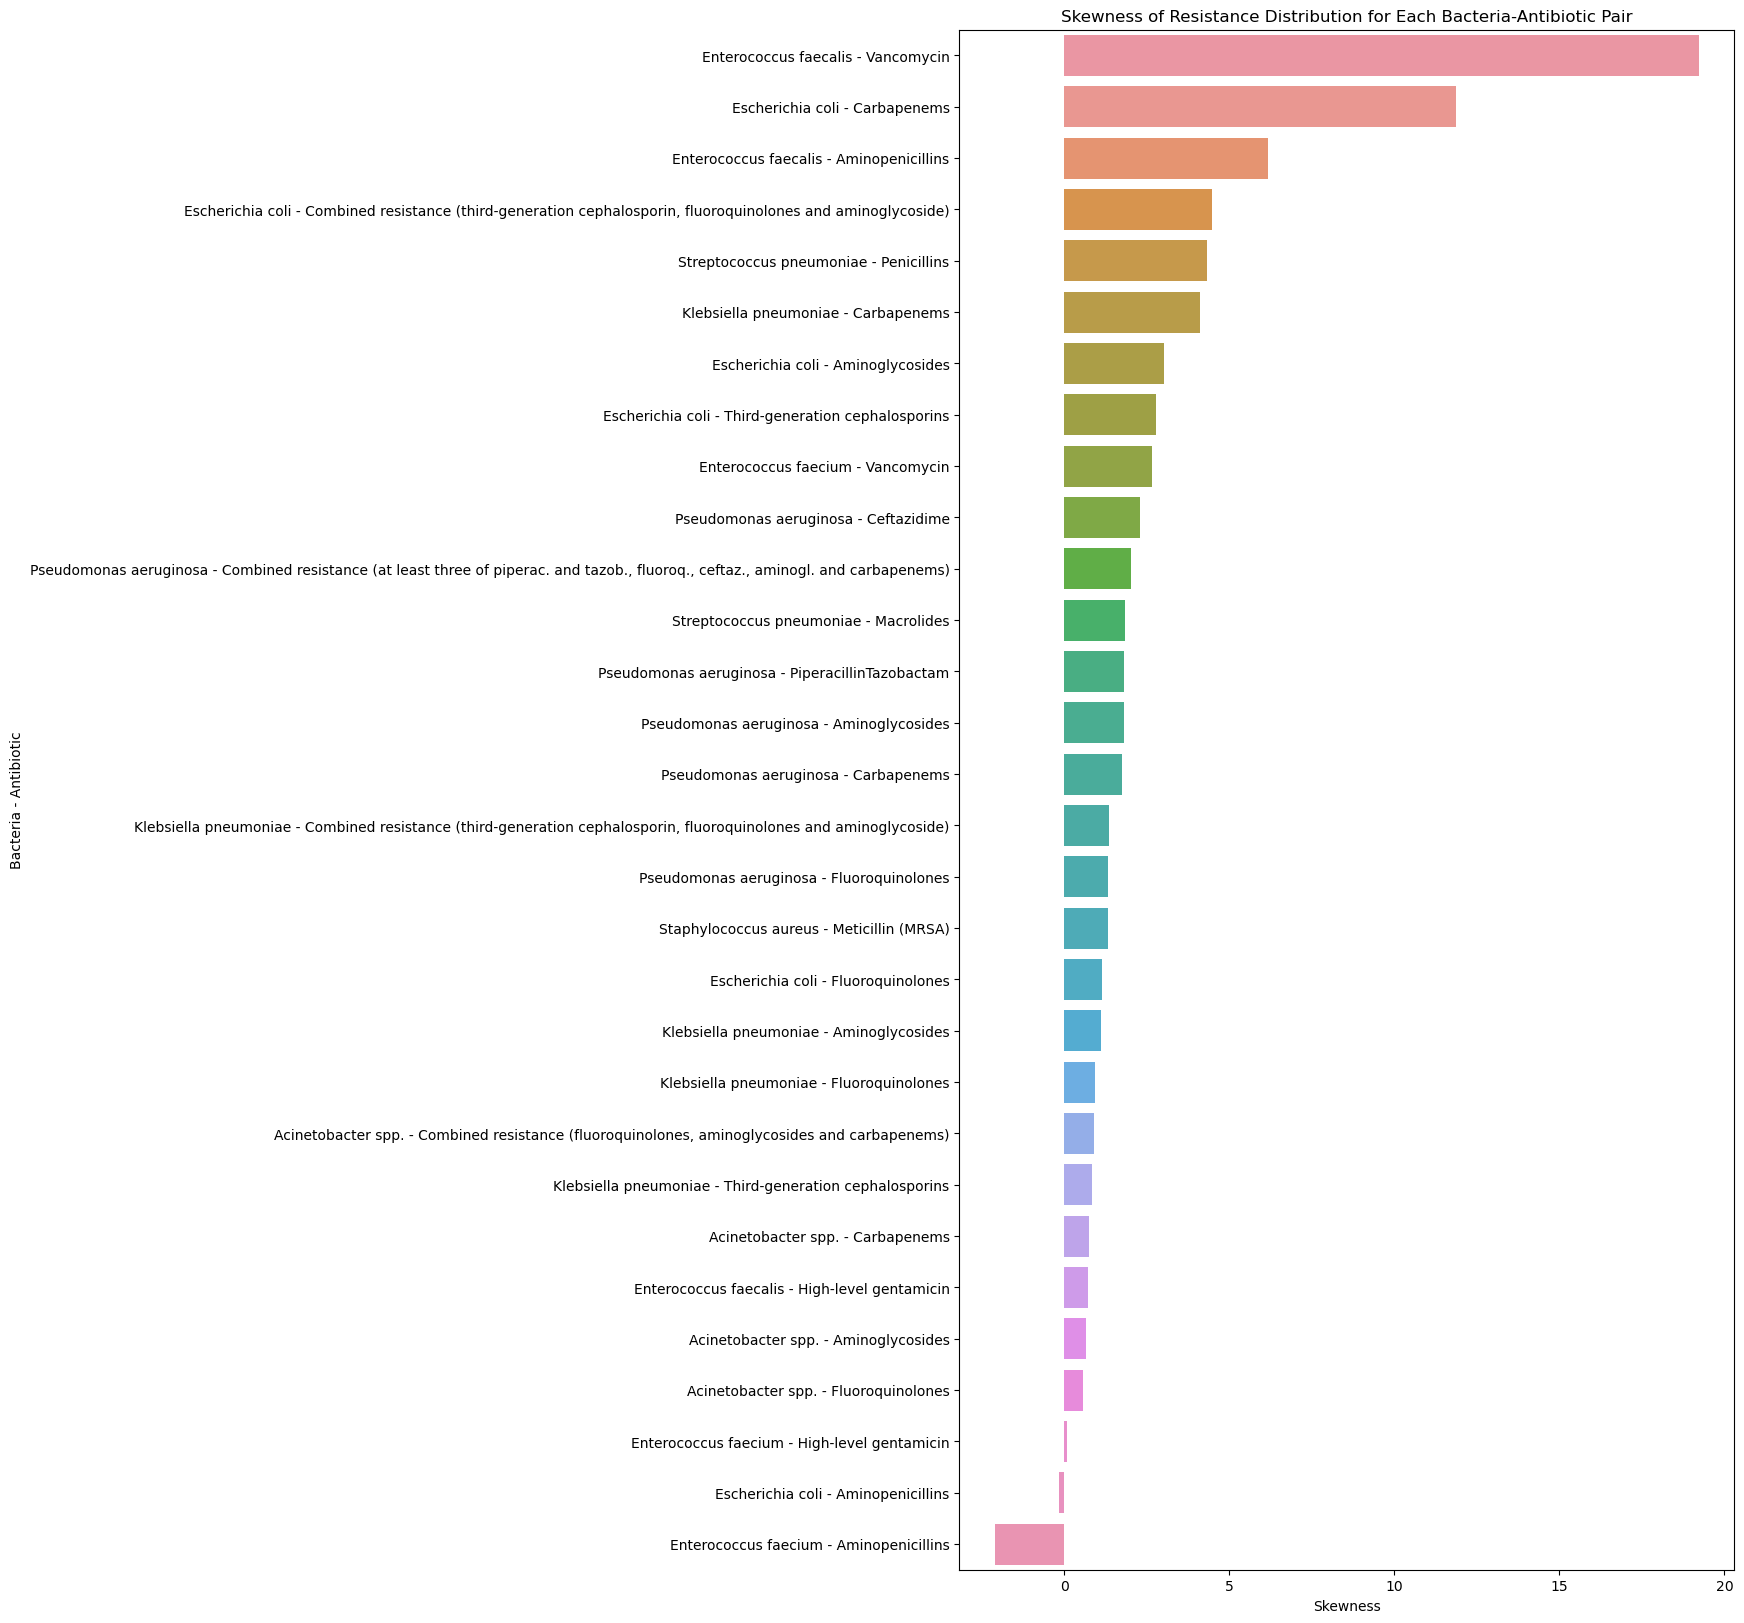

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supponendo che 'values' sia una colonna nel DataFrame che rappresenta la distribuzione completa dei dati
data.groupby(['Bacteria', 'Antibiotic'])['Value'].apply(lambda x: x.skew())

# Calcolo della skewness per ogni coppia di batterio e antibiotico
skewness = data.groupby(['Bacteria', 'Antibiotic'])['Value'].apply(lambda x: x.skew()).reset_index()

# Creazione di una nuova colonna per facilitare la visualizzazione
skewness['Bacteria_Antibiotic'] = skewness['Bacteria'] + " - " + skewness['Antibiotic']

# Ordinamento dei dati in base al valore della skewness
skewness = skewness.sort_values(by='Value', ascending=False)

plt.figure(figsize=(10,20))

# Creazione del grafico a barre
sns.barplot(data=skewness, y='Bacteria_Antibiotic', x='Value')

plt.xlabel('Skewness')
plt.ylabel('Bacteria - Antibiotic')
plt.title('Skewness of Resistance Distribution for Each Bacteria-Antibiotic Pair')

plt.show()


#### Osservazioni 

La maggior parte dei batteri ha una asimmetria positiva per la resistenza agli antibiotici, il che significa che la coda della distribuzione è più lunga sulla destra. Questo suggerisce che ci sono alcuni batteri con una resistenza molto alta agli antibiotici che influenzano la forma della distribuzione.

Alcuni batteri, come Enterococcus faecium con Aminopenicillins e Escherichia coli con Aminopenicillins, mostrano asimmetria negativa. Questo significa che ci sono alcuni batteri con una resistenza molto bassa agli antibiotici che spingono la distribuzione ad essere più lunga a sinistra.

Alcuni batteri mostrano un'asimmetria estremamente alta, come Enterococcus faecalis con Vancomycin (19.23) e Escherichia coli con Carbapenems (11.85), suggerendo una distribuzione molto asimmetrica con una coda lunga a destra.

Al contrario, Enterococcus faecium con Aminopenicillins mostra un'asimmetria estremamente negativa (-2.11), suggerendo una distribuzione molto asimmetrica con una coda lunga a sinistra.

#### Considerazioni 

Queste osservazioni indicano che la resistenza agli antibiotici non è distribuita uniformemente tra i batteri e può variare notevolmente. Alcuni batteri possono avere una resistenza molto alta o molto bassa rispetto alla media, creando distribuzioni asimmetriche. 

Questo può avere implicazioni importanti per il trattamento delle infezioni batteriche, poiché può essere necessario considerare la variazione nella resistenza degli antibiotici quando si sceglie un trattamento.





### Ci sono valori estremi?

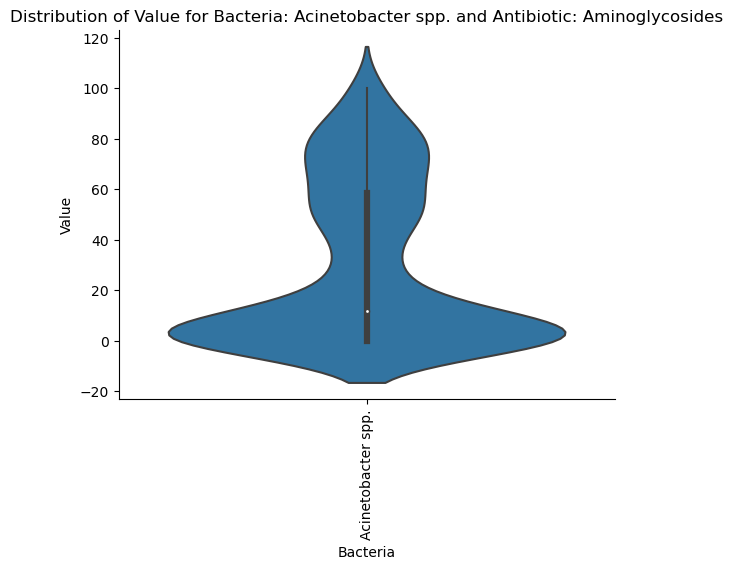

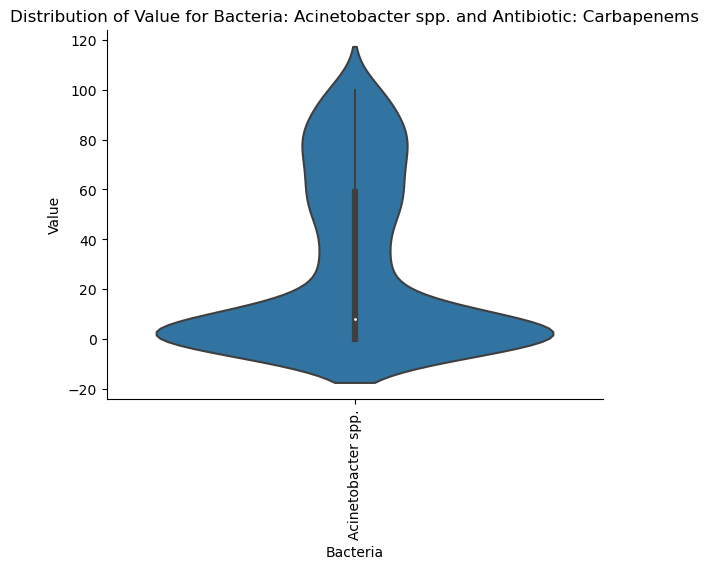

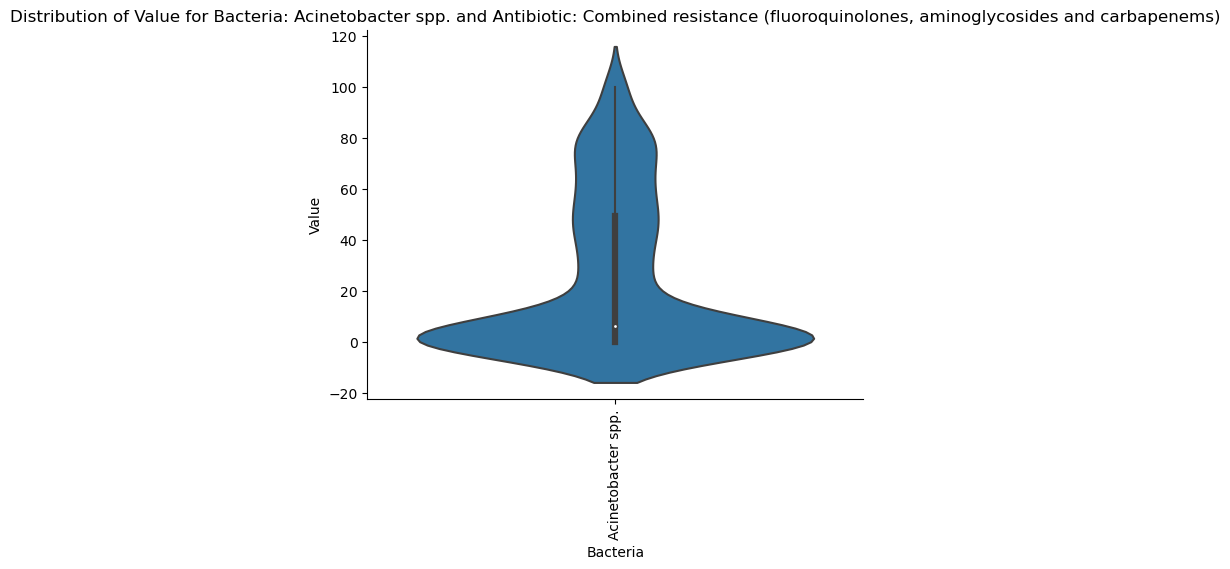

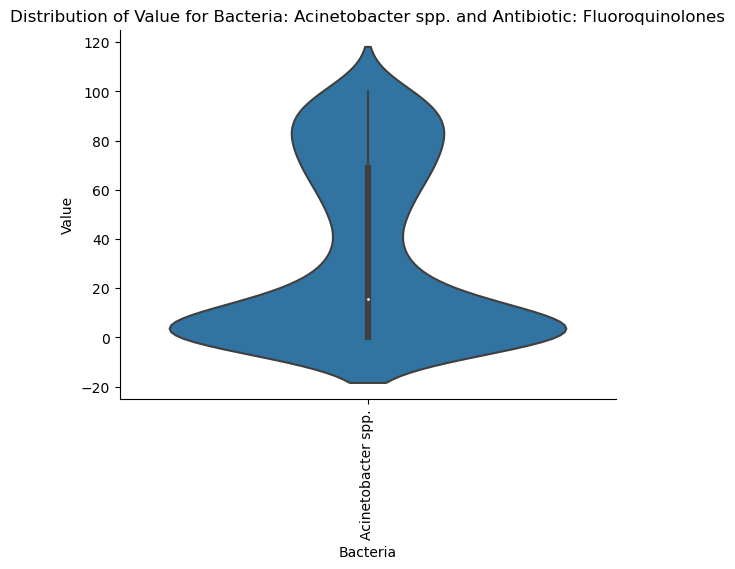

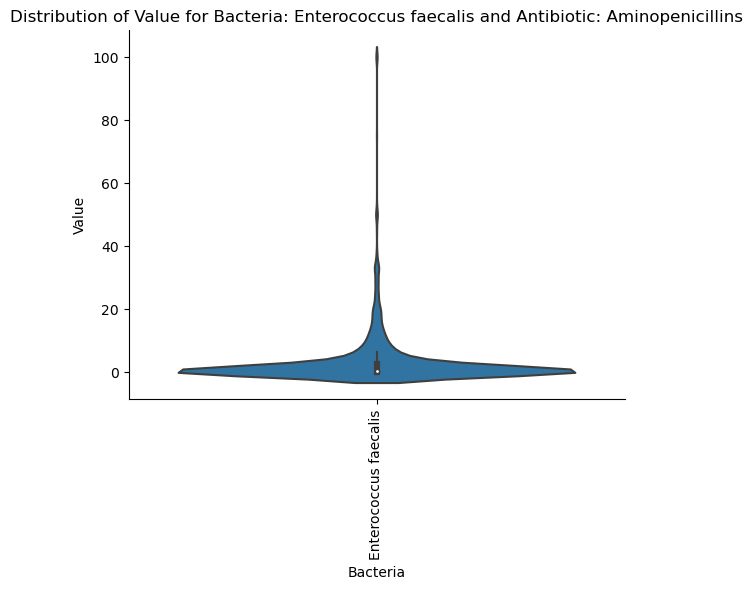

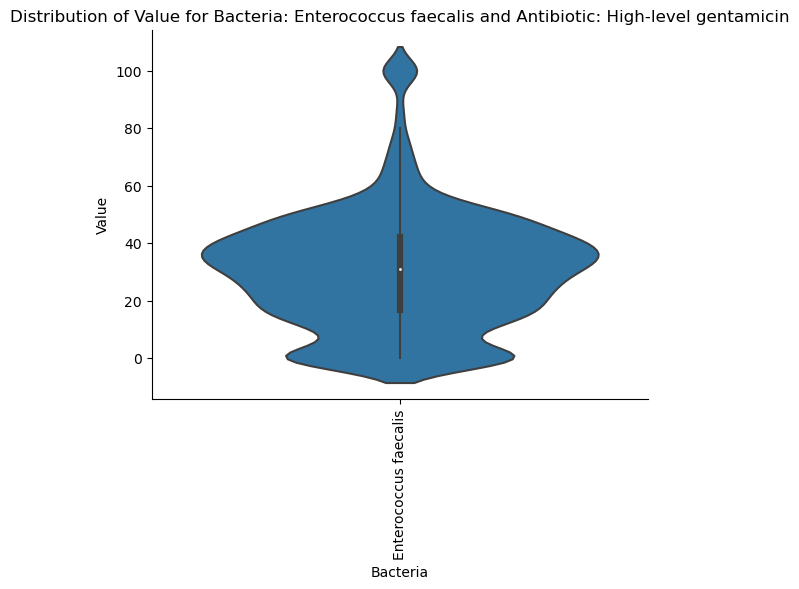

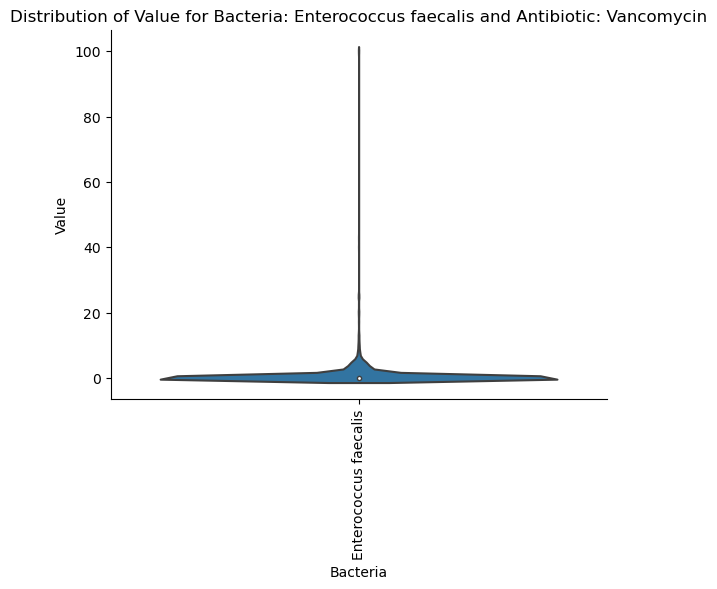

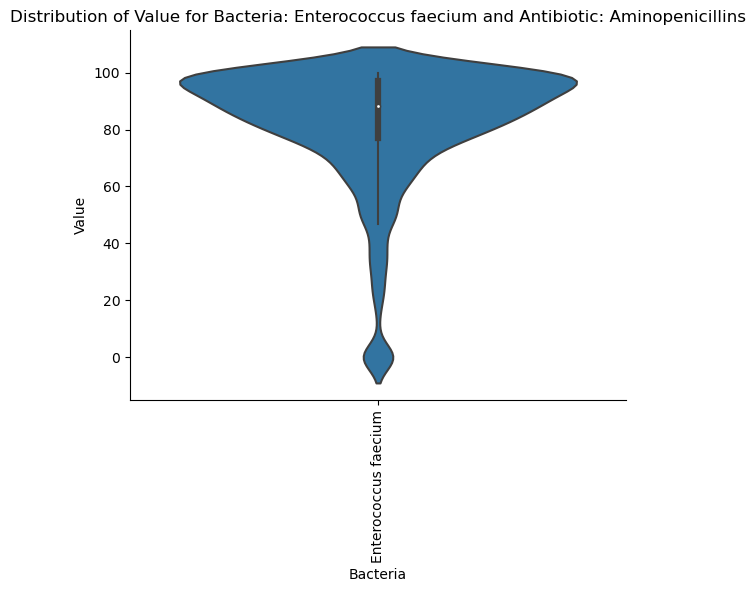

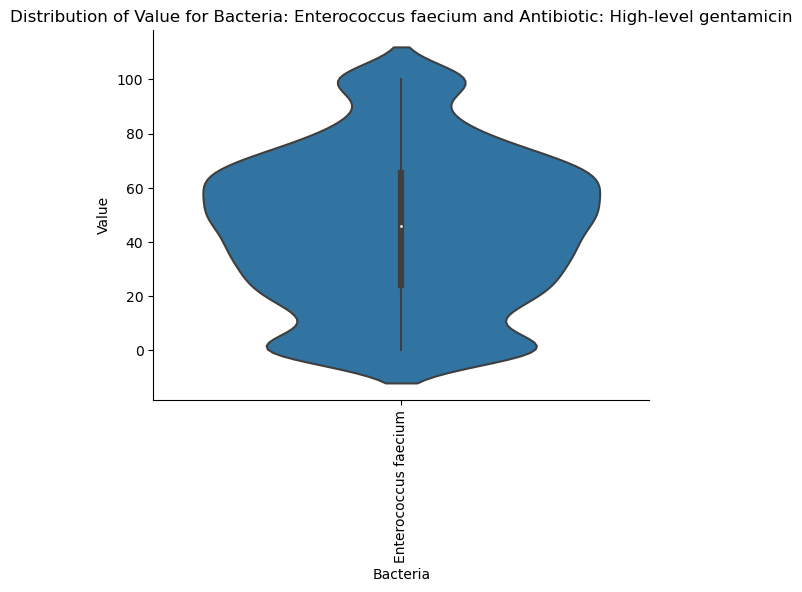

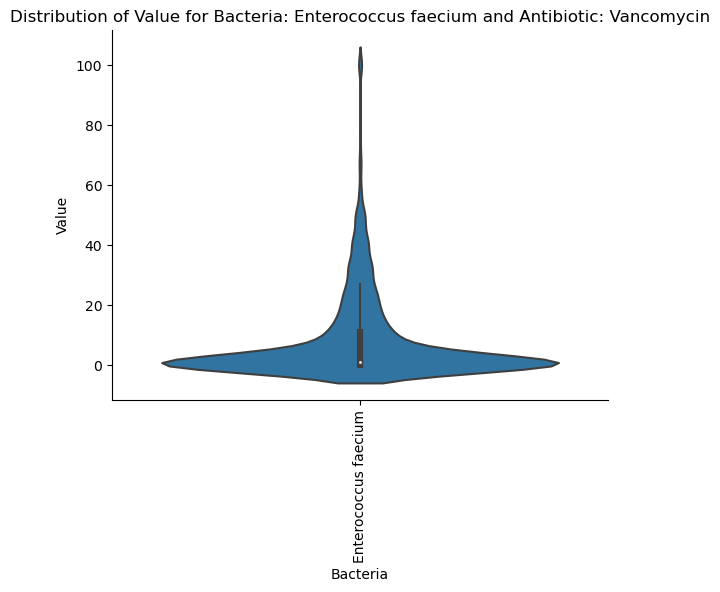

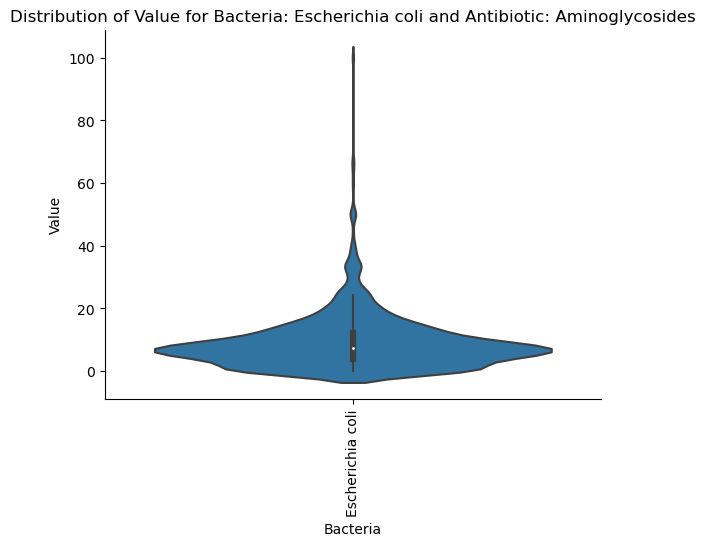

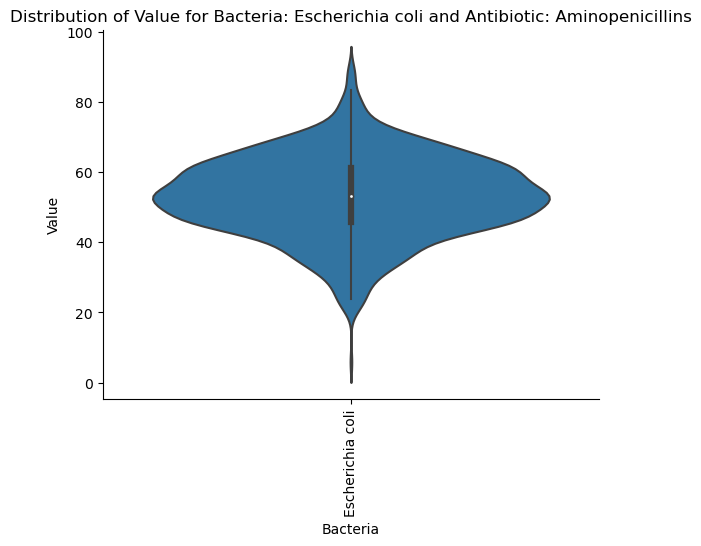

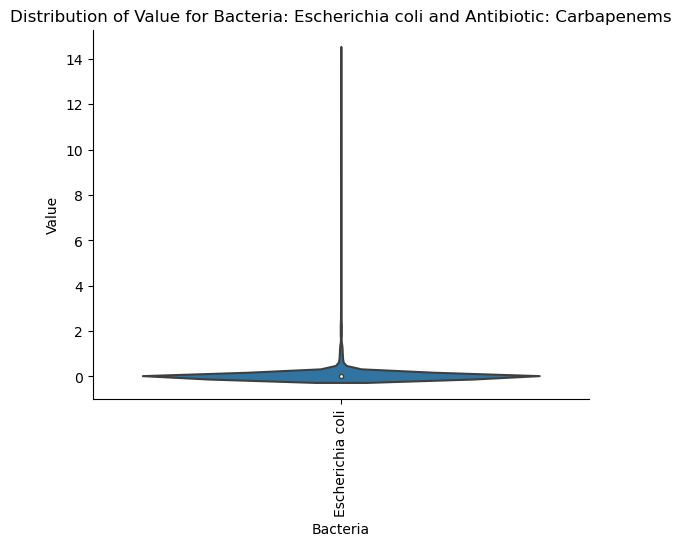

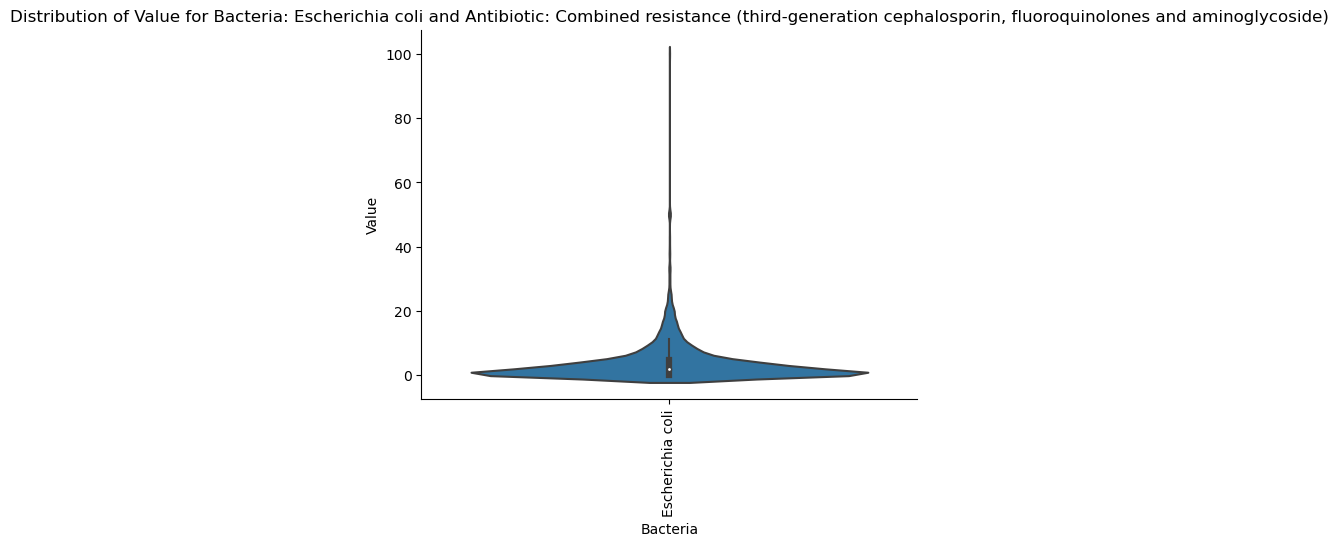

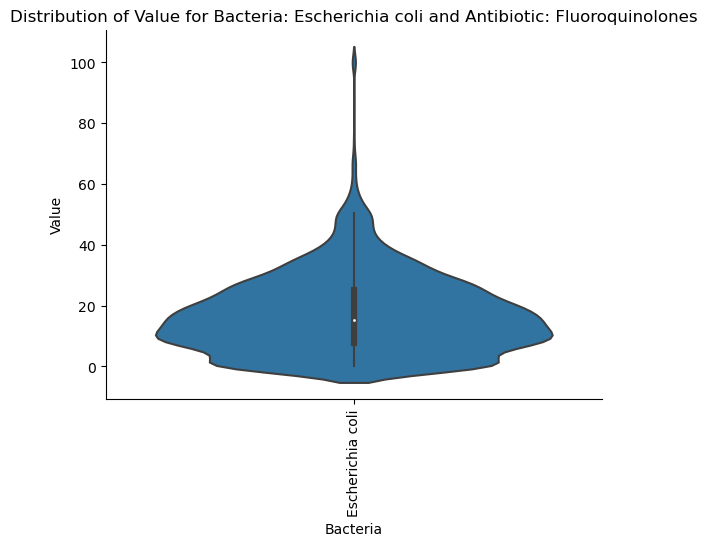

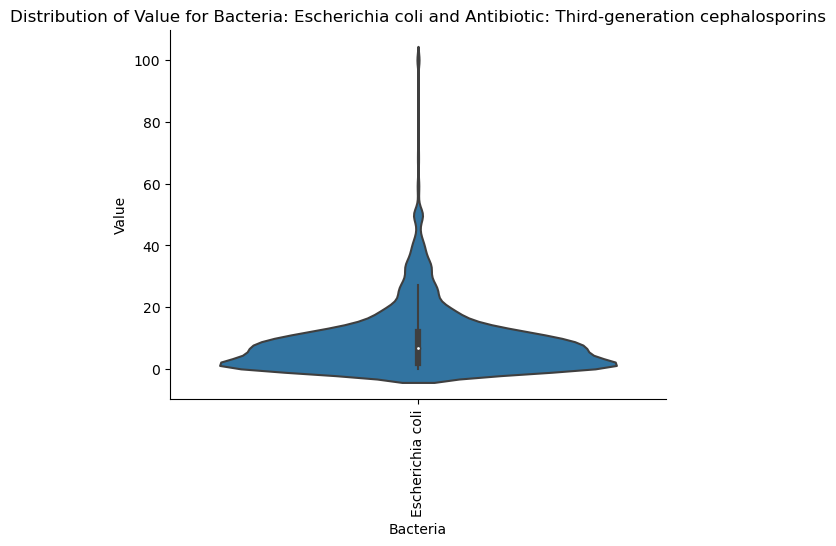

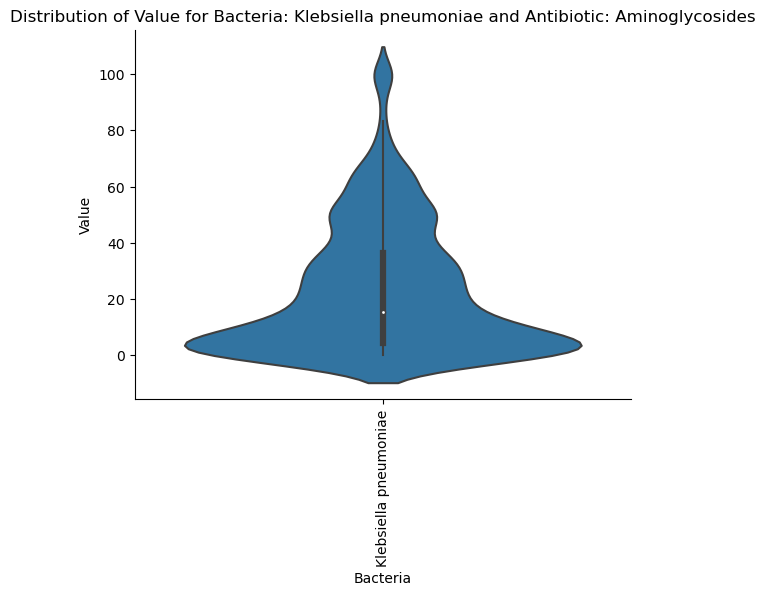

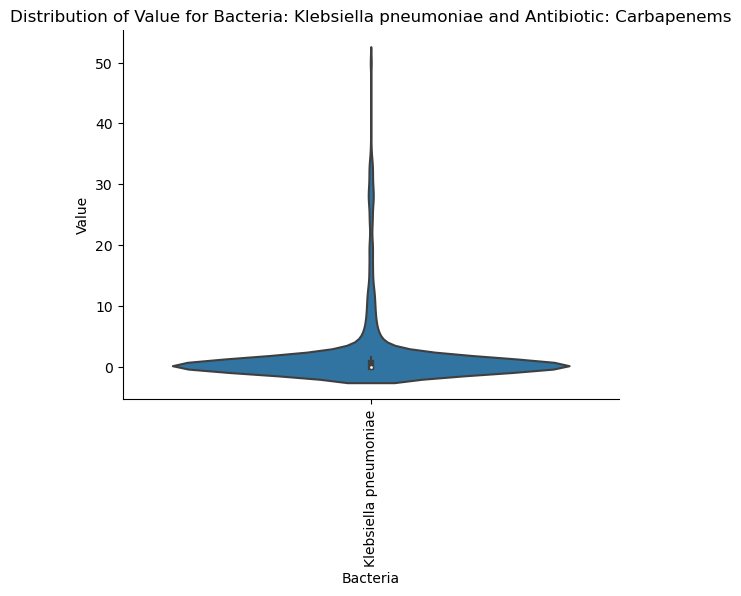

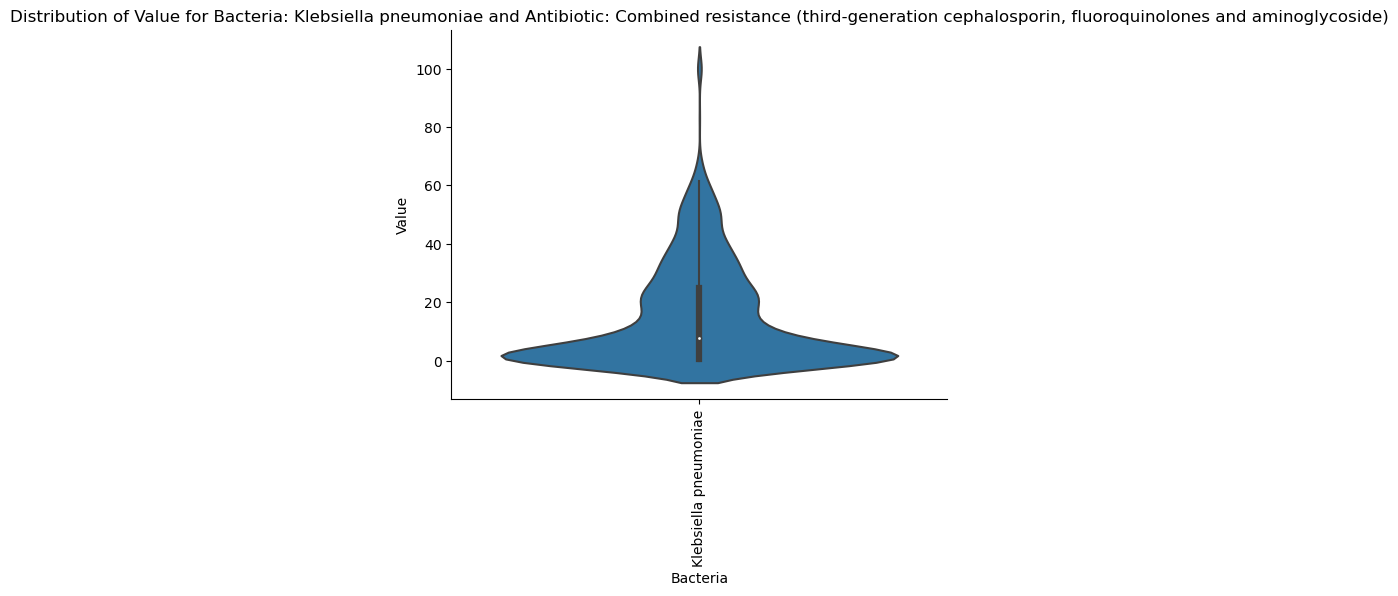

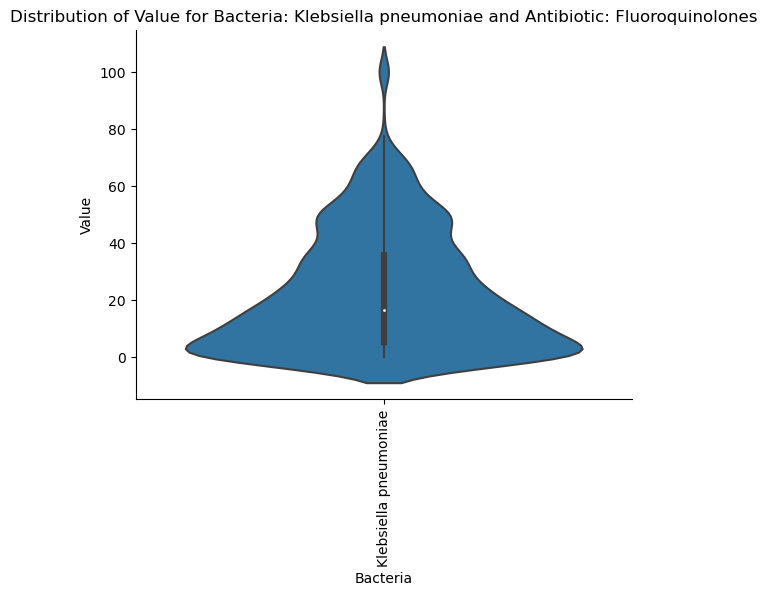

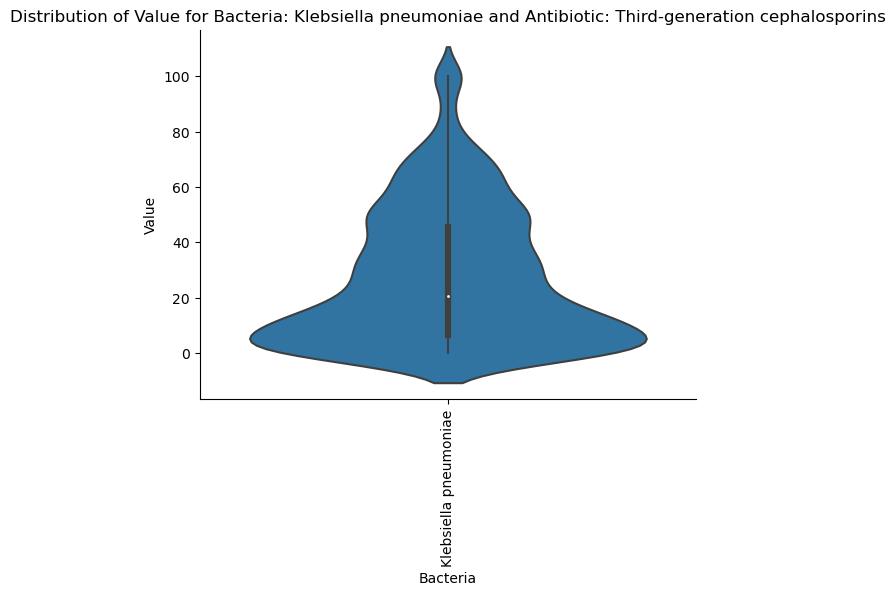

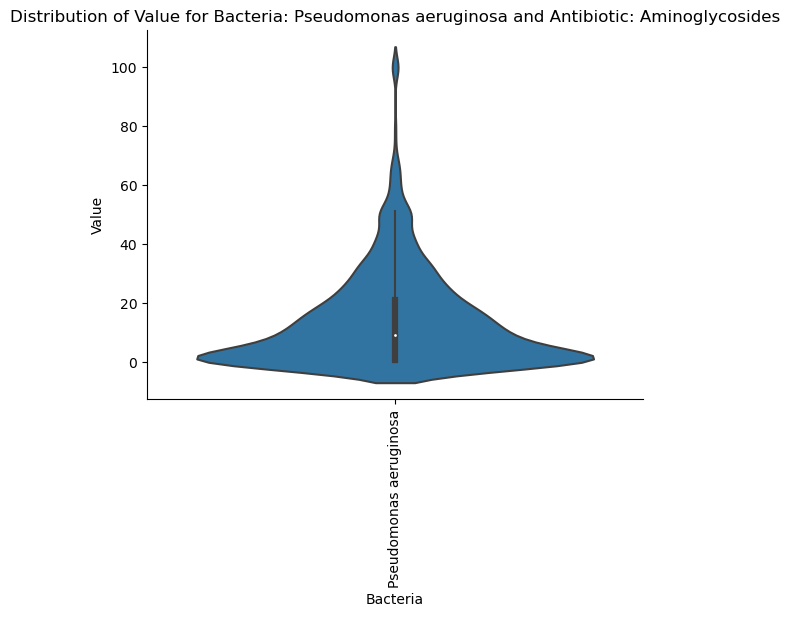

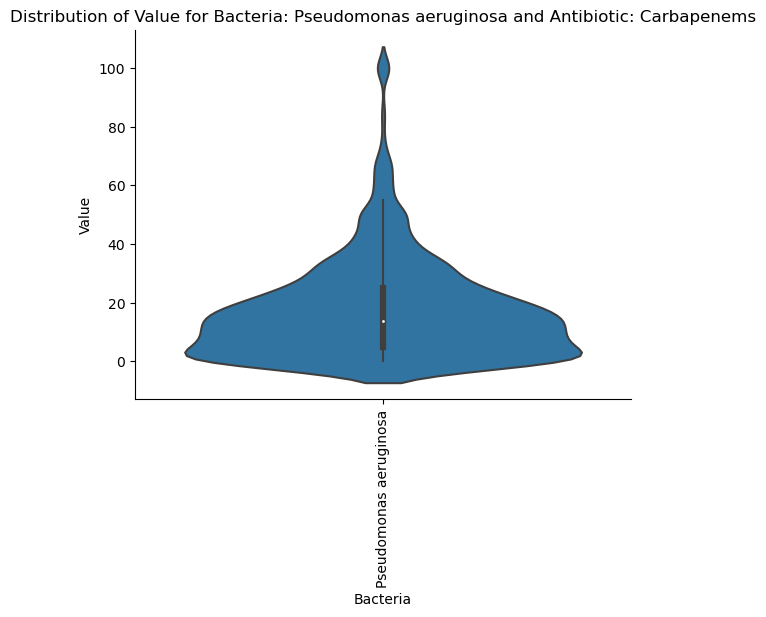

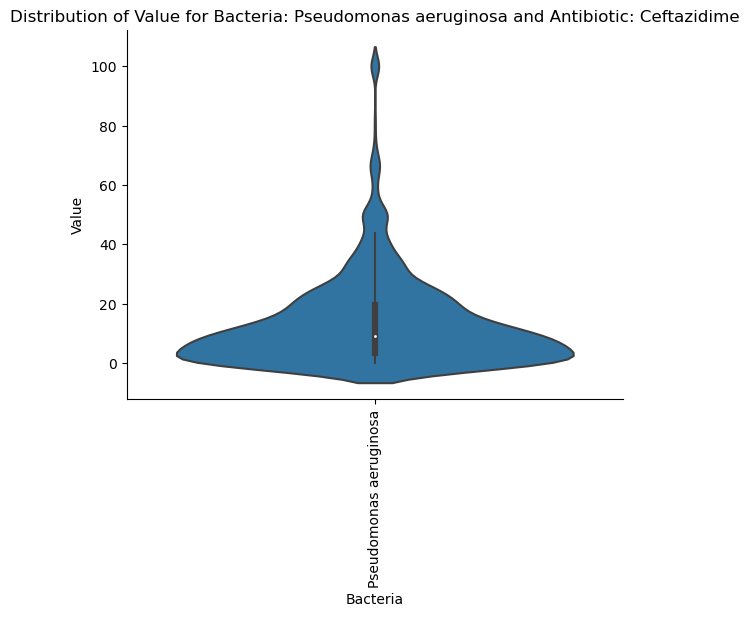

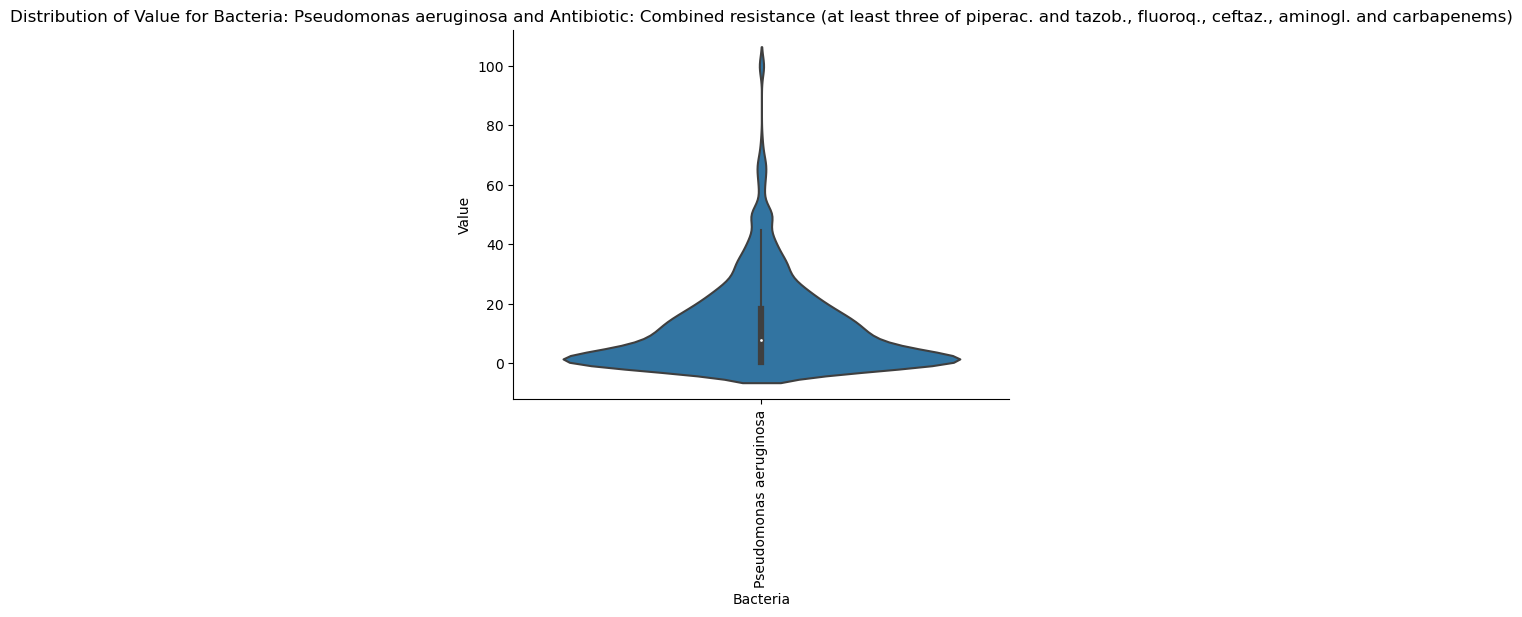

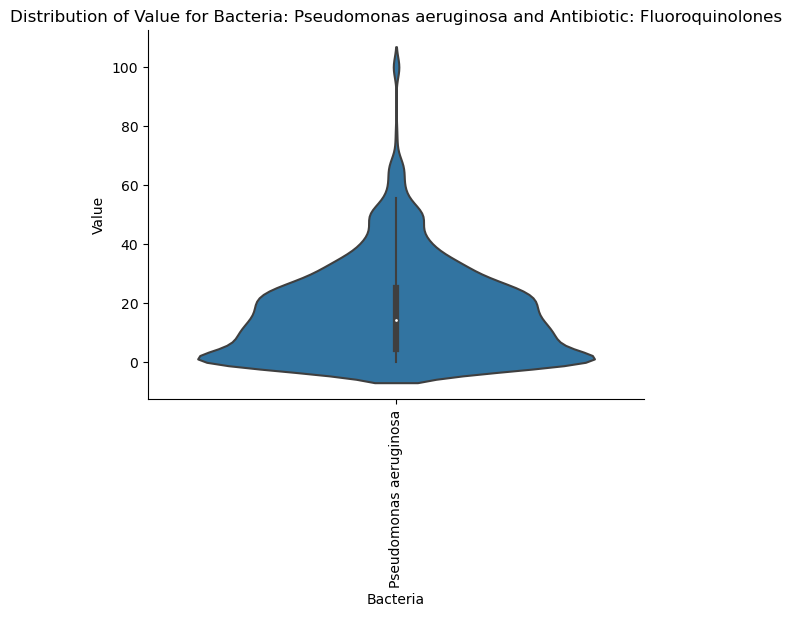

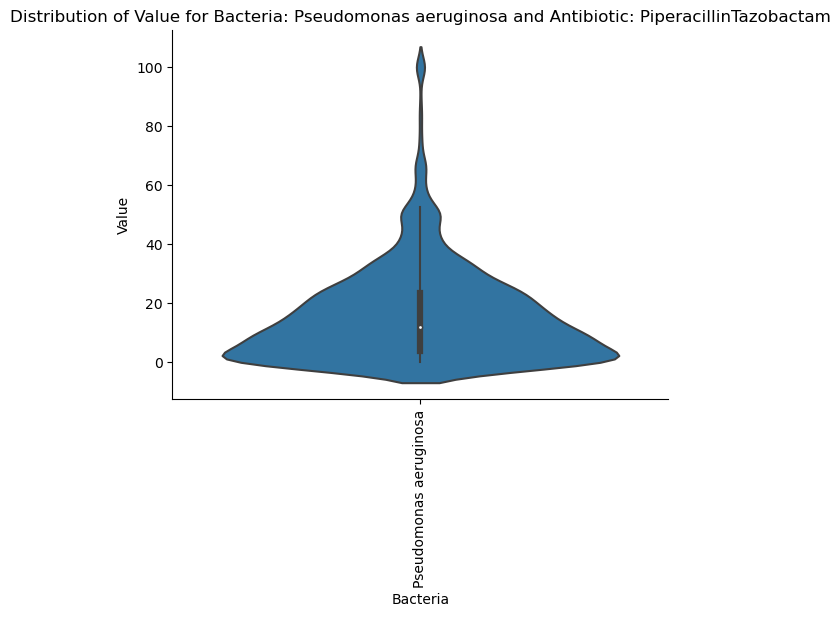

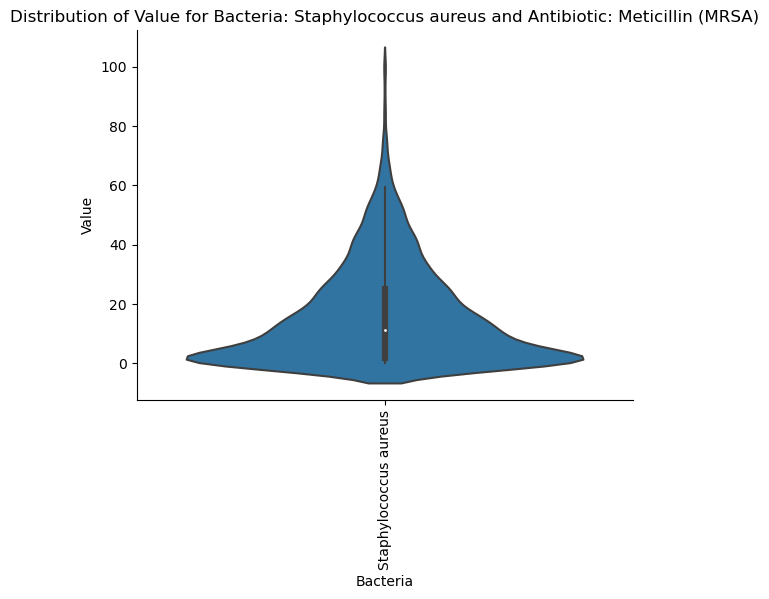

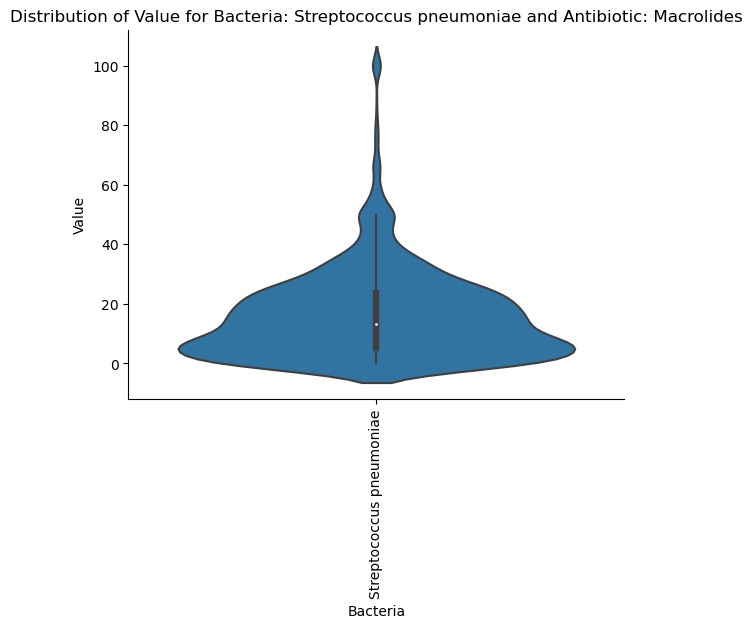

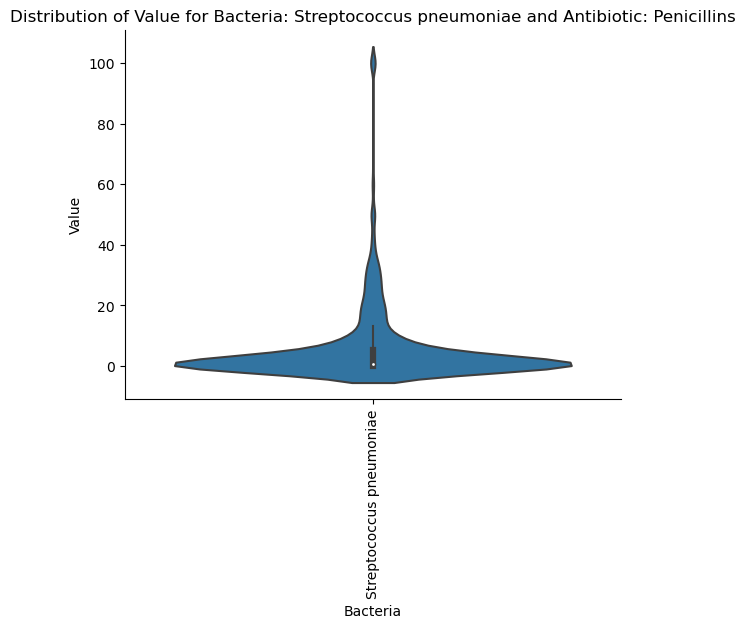

In [23]:
import seaborn as sns

# Loop through each unique combination of bacteria and antibiotic
for bacteria, antibiotic in resistance_grouped[['Bacteria', 'Antibiotic']].values:
    # Filter the data for the current bacteria and antibiotic combination
    filtered_data = data[(data['Bacteria'] == bacteria) & (data['Antibiotic'] == antibiotic)]
    
    # Create a violin plot with seaborn
    sns.violinplot(x='Bacteria', y='Value', data=filtered_data)
    sns.despine()  # This removes the top and right spines from the plot
    plt.title(f'Distribution of Value for Bacteria: {bacteria} and Antibiotic: {antibiotic}')
    plt.xticks(rotation=90)
    plt.show()


#### Presenza di outliers?

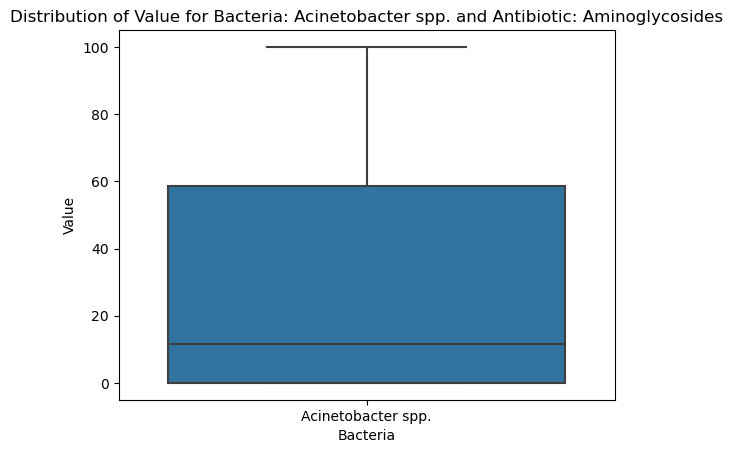

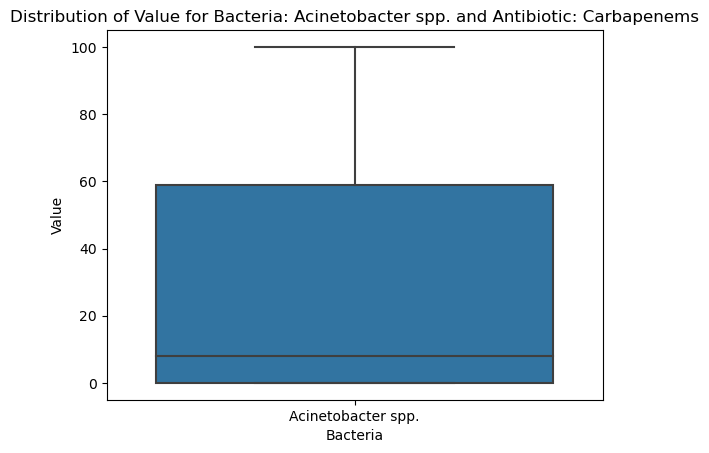

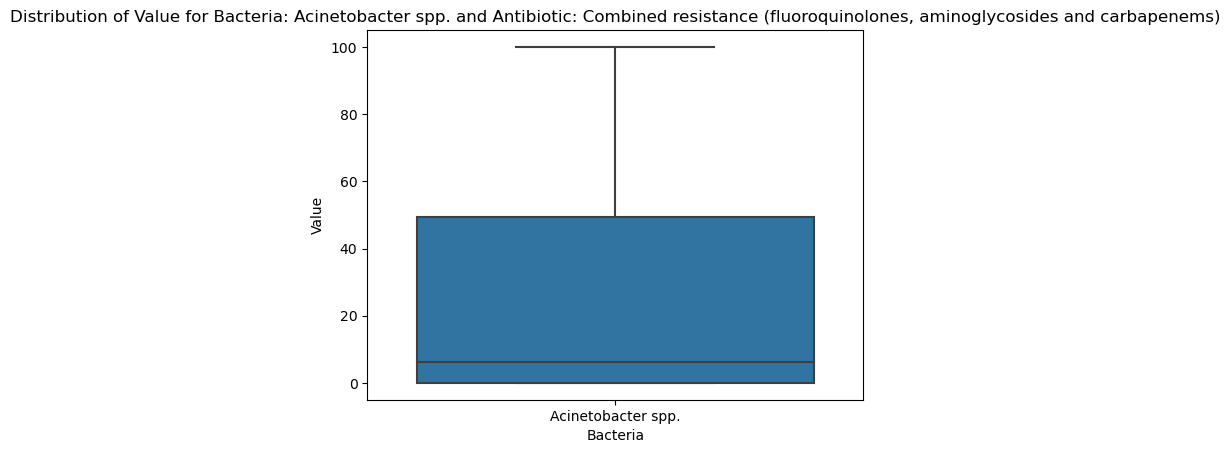

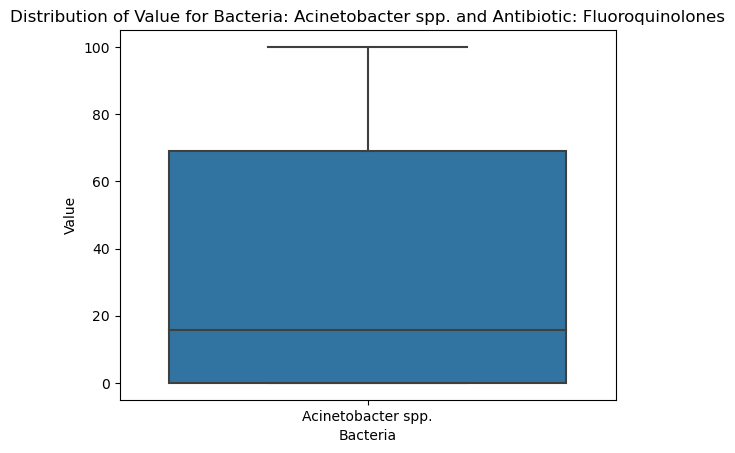

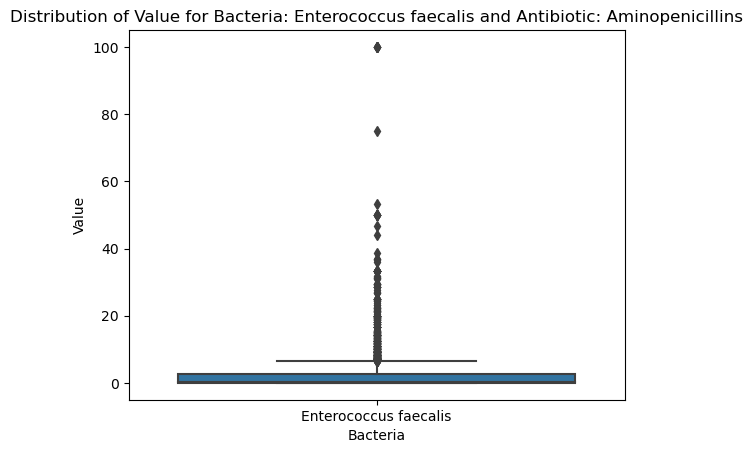

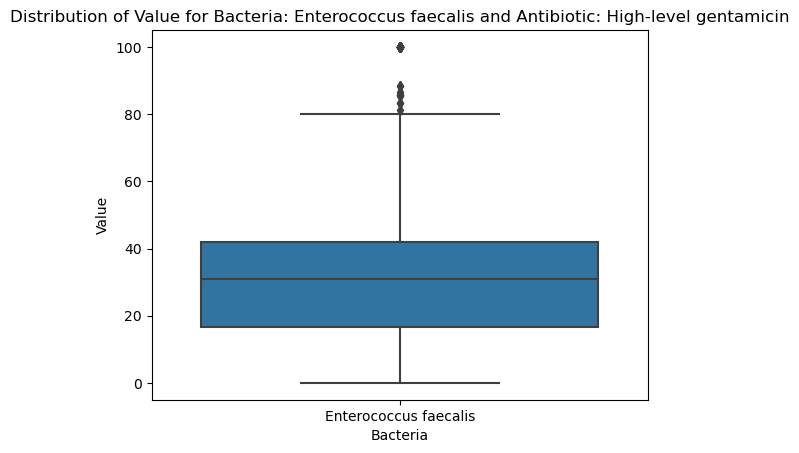

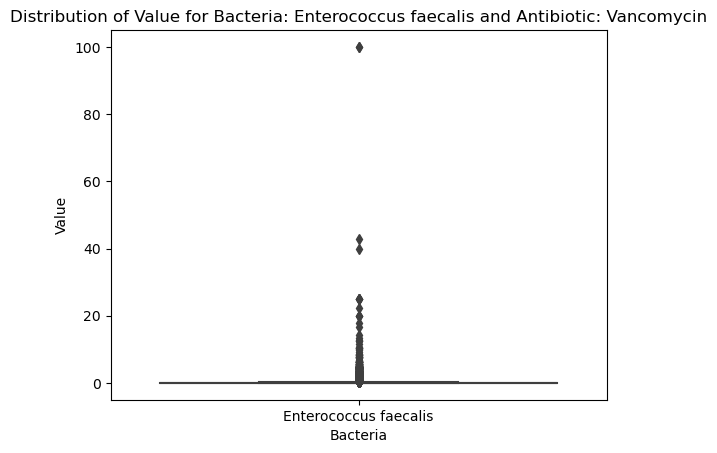

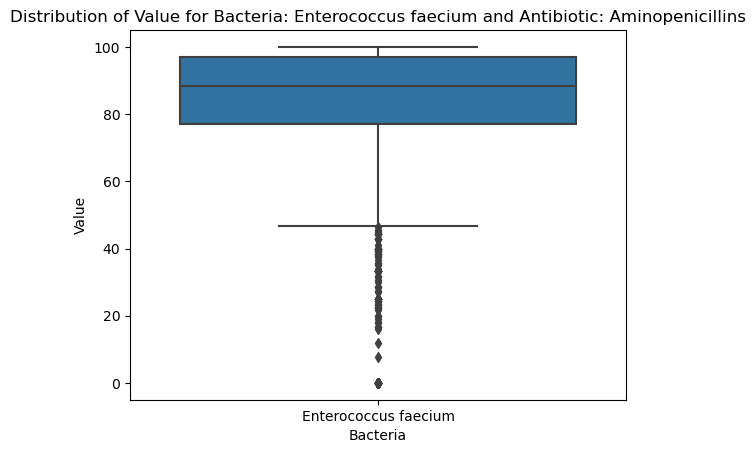

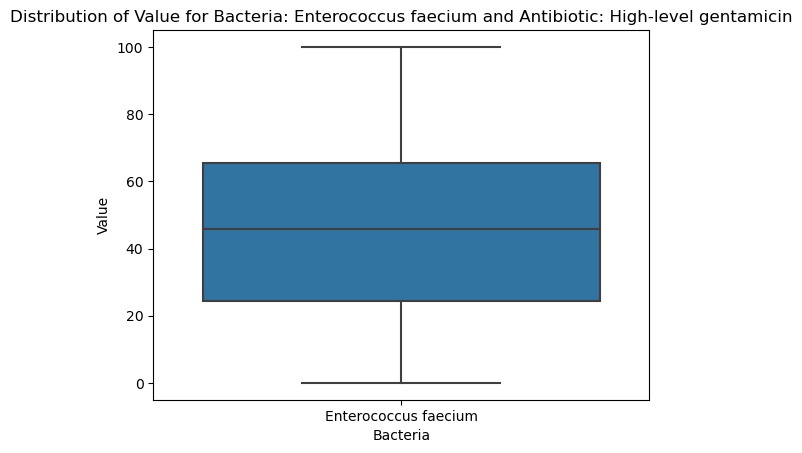

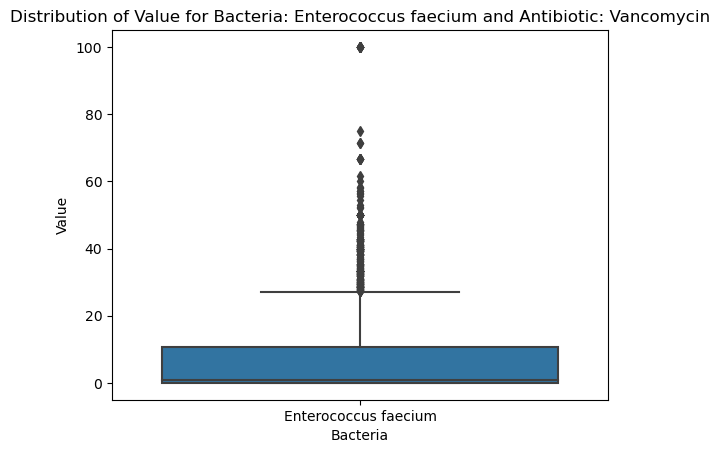

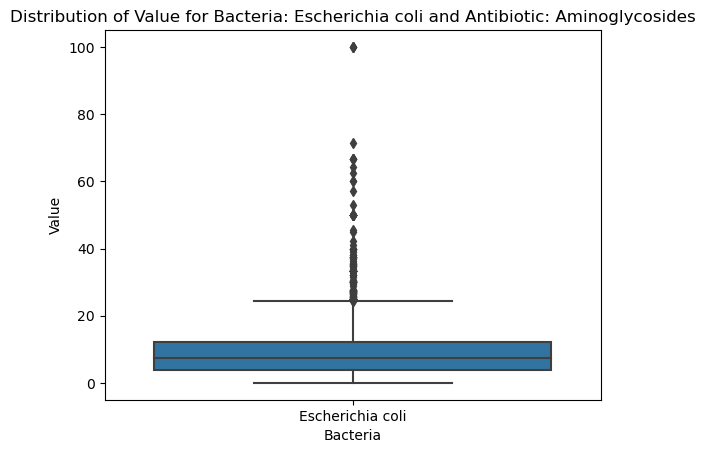

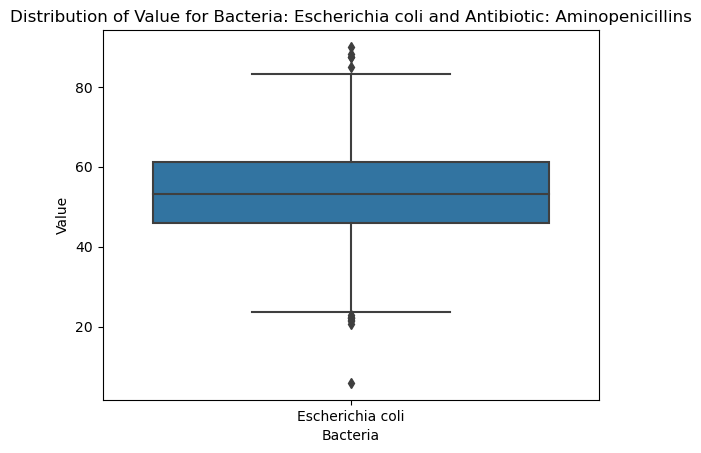

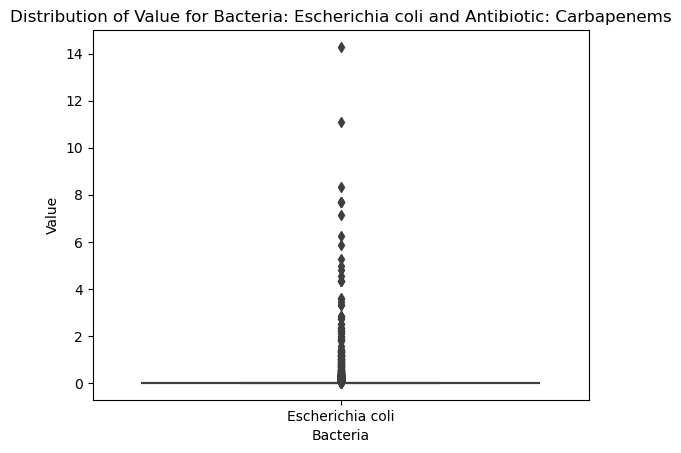

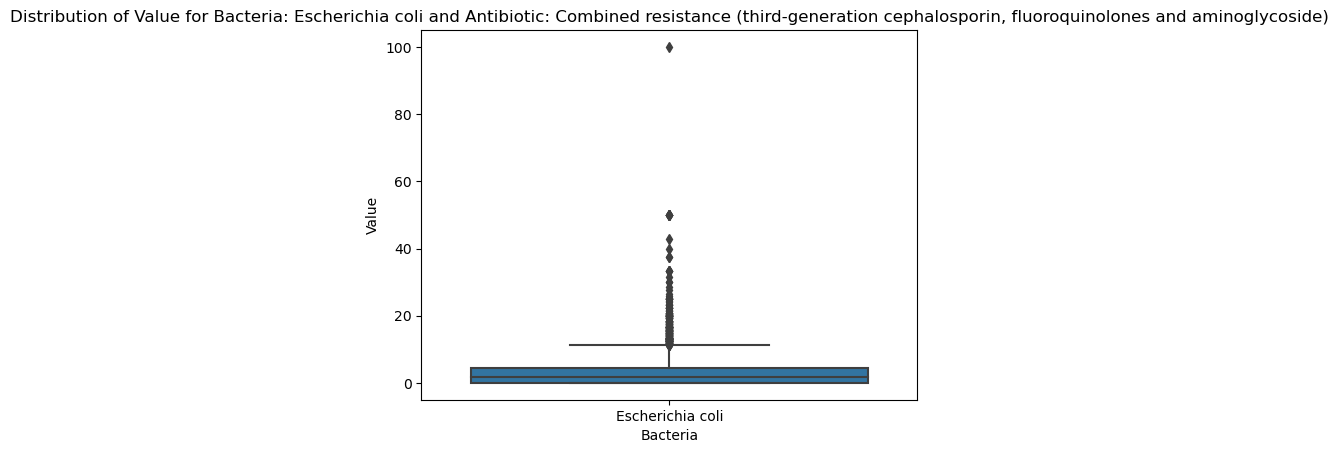

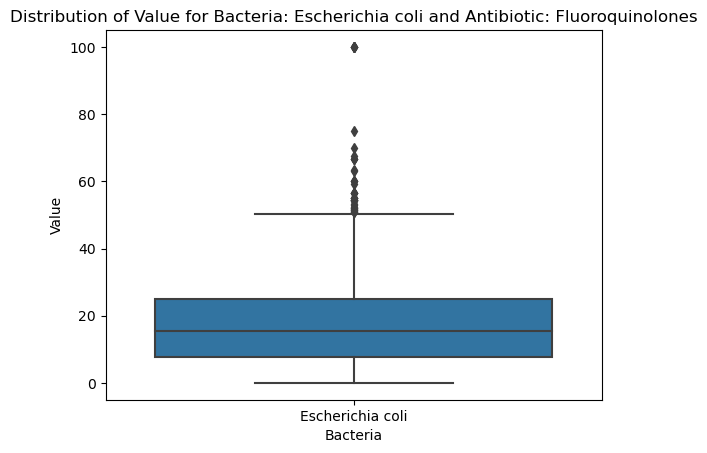

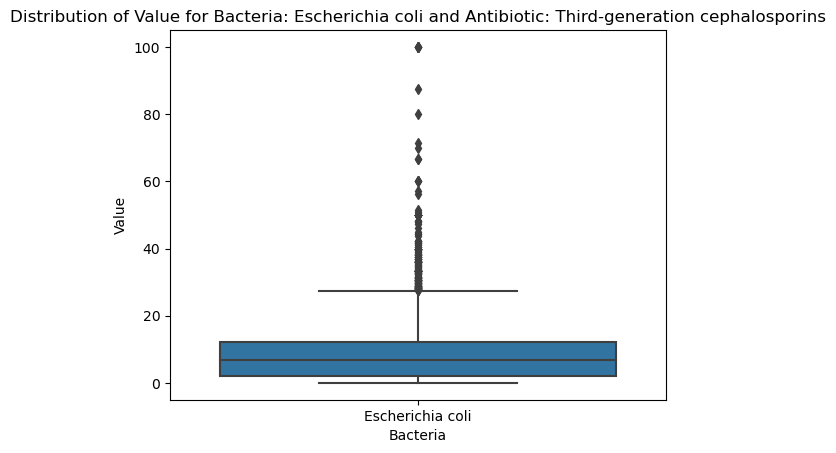

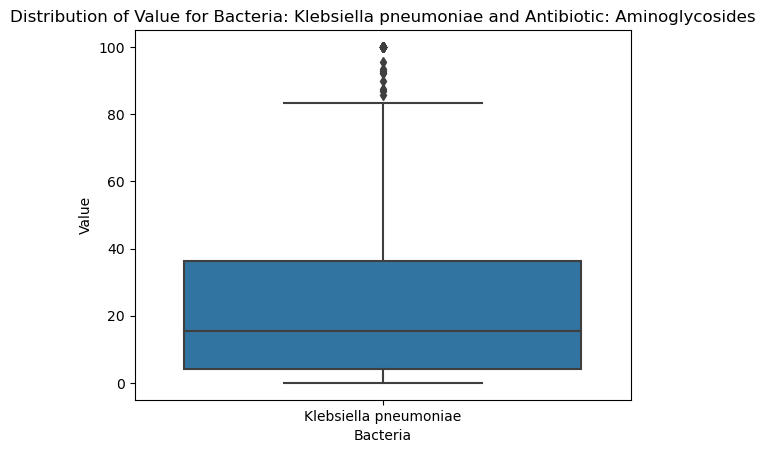

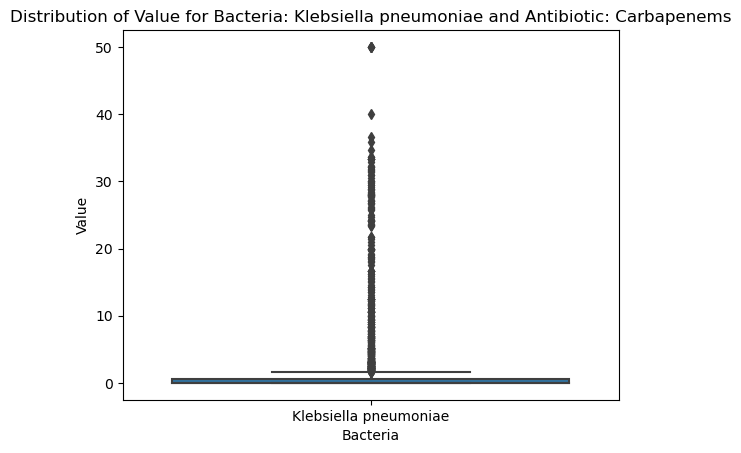

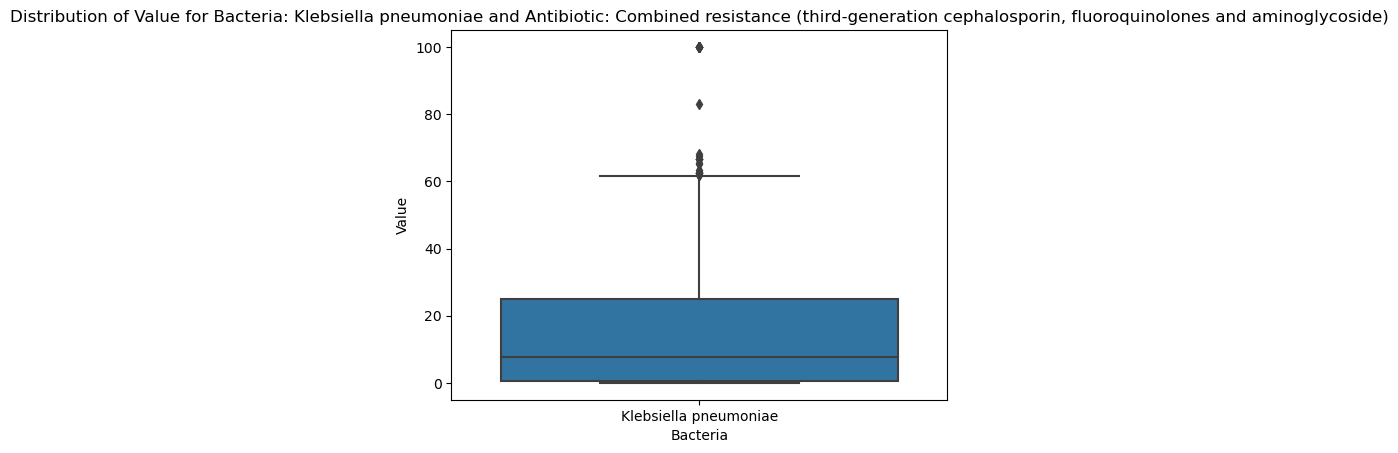

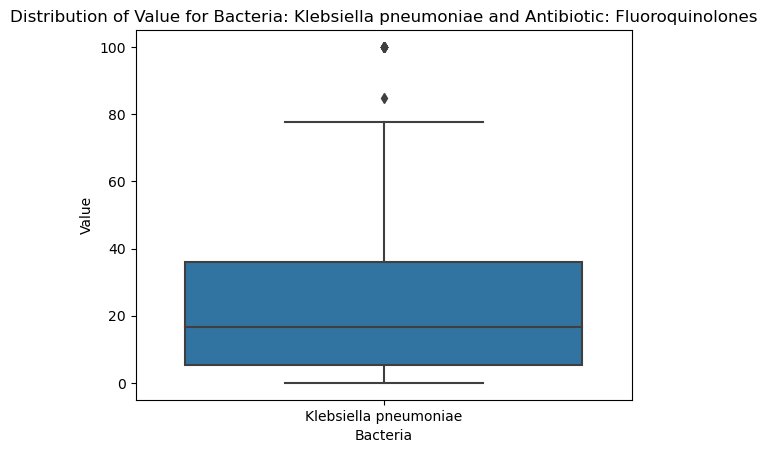

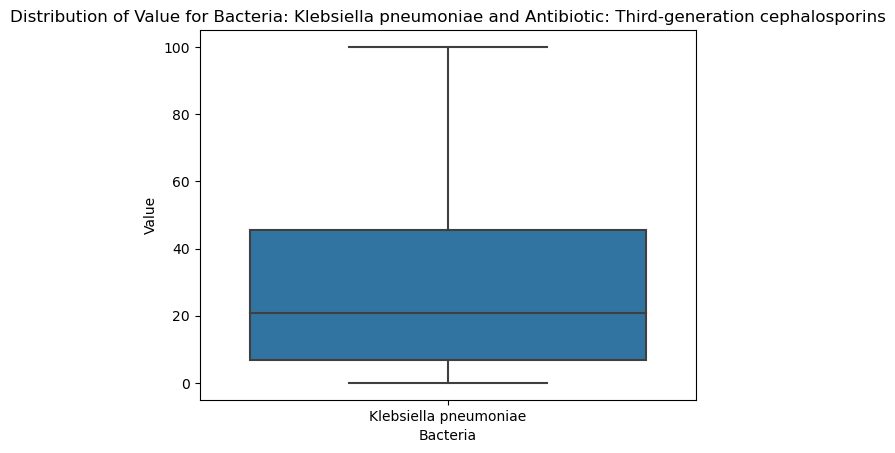

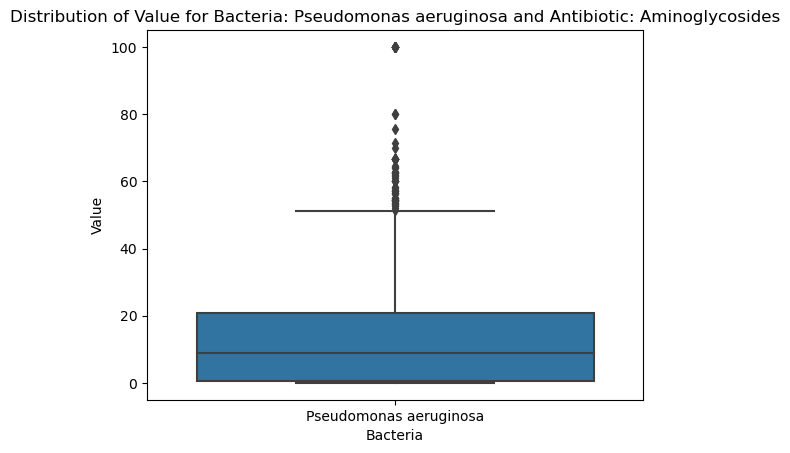

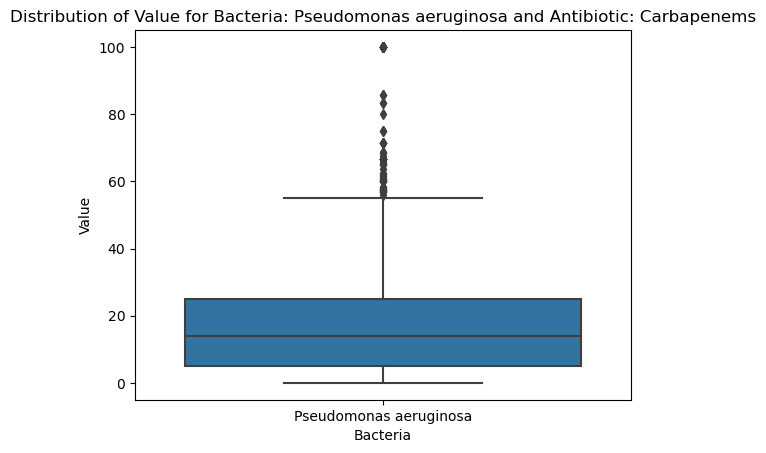

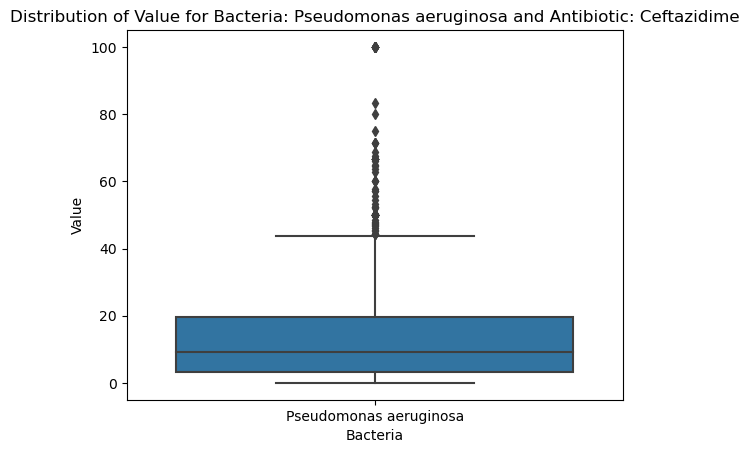

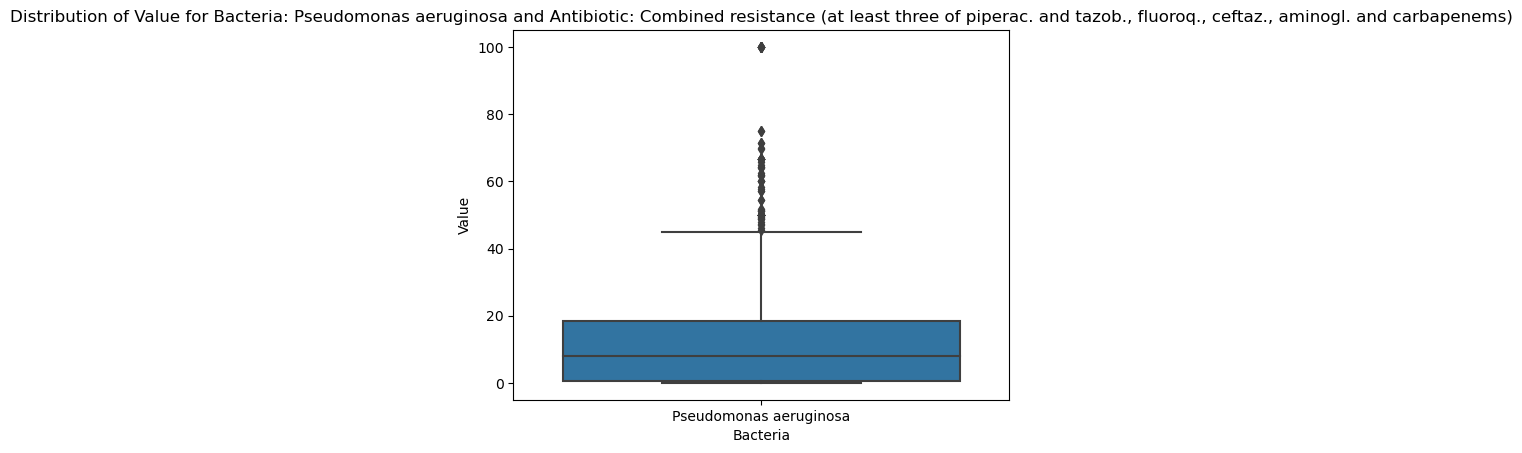

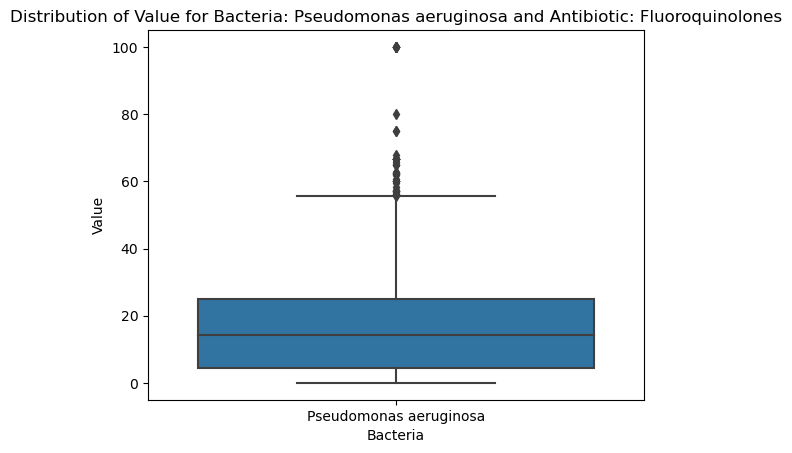

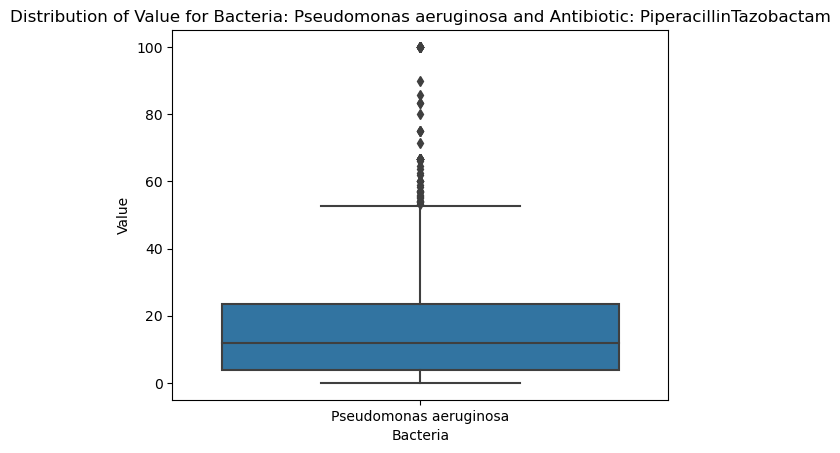

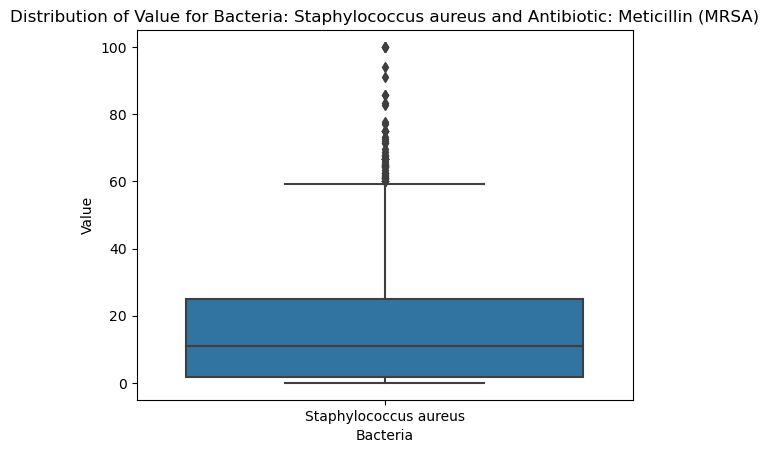

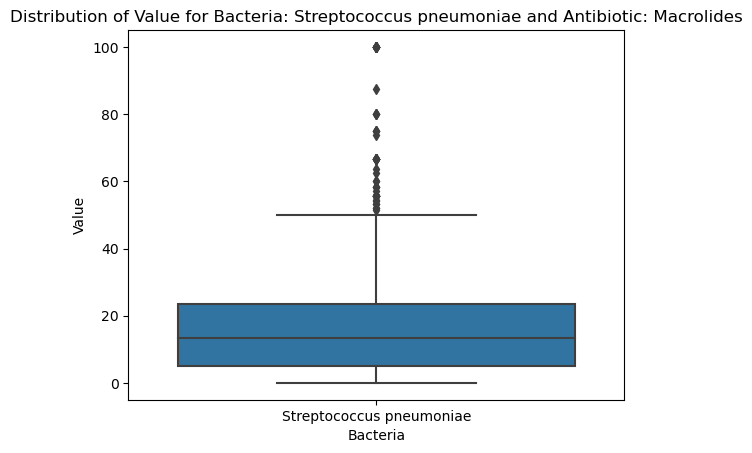

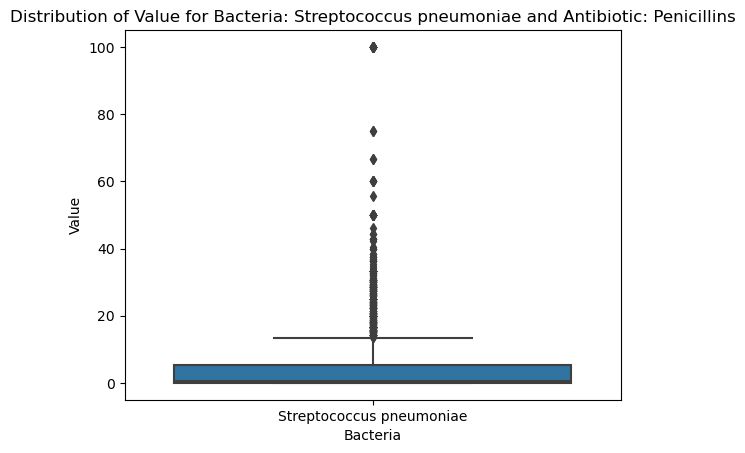

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each unique combination of bacteria and antibiotic
for bacteria, antibiotic in resistance_grouped[['Bacteria', 'Antibiotic']].values:
    # Filter the data for the current bacteria and antibiotic combination
    filtered_data = data[(data['Bacteria'] == bacteria) & (data['Antibiotic'] == antibiotic)]
    
    # Create a box plot with seaborn
    sns.boxplot(x='Bacteria', y='Value', data=filtered_data)
    plt.title(f'Distribution of Value for Bacteria: {bacteria} and Antibiotic: {antibiotic}')
    plt.show()



### Distribuzione della resistenza nelle categorie


In [25]:
# Esegui un'operazione groupby sulla base della 'Category' e calcola la media dei 'Value'
groupedmean = data.groupby('Category')['Value'].mean()

groupedmean



Category
0-4       12.885277
19-64     19.550569
5-18      15.338244
65+       18.495545
Female    18.965033
Male      20.849856
Name: Value, dtype: float64

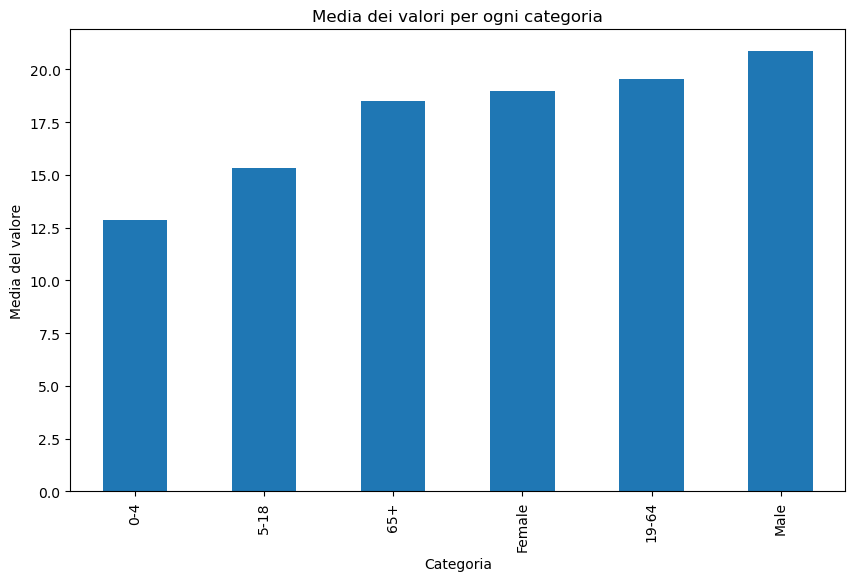

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Ordina i valori in ordine crescente
groupedmean_sorted = groupedmean.sort_values()

# Traccia il grafico con le barre ordinate
plt.figure(figsize=(10, 6))
groupedmean_sorted.plot(kind='bar')

plt.title('Media dei valori per ogni categoria')
plt.xlabel('Categoria')
plt.ylabel('Media del valore')
plt.show()



In [27]:
groupedmedian = data.groupby('Category')['Value'].median()

groupedmedian 

Category
0-4        0.000000
19-64     10.344828
5-18       0.000000
65+        9.151547
Female     9.465649
Male      11.764706
Name: Value, dtype: float64

In [28]:
# Calcola la differenza tra groupedmean e groupedmedian
difference = groupedmean - groupedmedian

# Visualizza il risultato
difference


Category
0-4       12.885277
19-64      9.205742
5-18      15.338244
65+        9.343998
Female     9.499384
Male       9.085150
Name: Value, dtype: float64

### Osservazioni 

La differenza netta tra la media e la mediana può indicare che la distribuzione dei dati in ciascun gruppo è asimmetrica o che ci sono valori anomali che influenzano la media. In generale, quando la differenza tra la media e la mediana è significativa, potrebbe essere utile indagare ulteriormente sulla distribuzione dei dati, controllare la presenza di valori anomali o considerare altre misure di dispersione per comprendere meglio la variabilità dei dati in ciascun gruppo.

## Outliers detection 

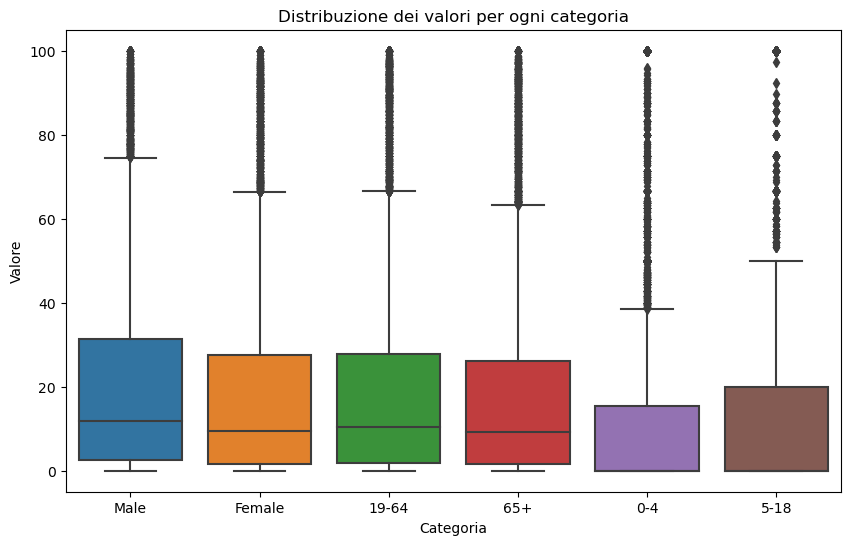

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Value', data=data, order=data['Category'].value_counts().index)

plt.title('Distribuzione dei valori per ogni categoria')
plt.xlabel('Categoria')
plt.ylabel('Valore')
plt.show()

In [30]:
# Calcola Q1 per ogni categoria "Category"
q1_by_category = data.groupby('Category')['Value'].quantile(0.25)

# Calcola Q3 per ogni categoria "Category"
q3_by_category = data.groupby('Category')['Value'].quantile(0.75)

# Calcola l'IQR per ogni categoria "Category"
iqr_by_category = q3_by_category - q1_by_category

# Visualizza i risultati
print("Q1:")
print(q1_by_category)
print("\nQ3:")
print(q3_by_category)
print("\nIQR:")
print(iqr_by_category)



Q1:
Category
0-4       0.000000
19-64     1.897019
5-18      0.000000
65+       1.577830
Female    1.628226
Male      2.479852
Name: Value, dtype: float64

Q3:
Category
0-4       15.384615
19-64     27.777778
5-18      20.000000
65+       26.243246
Female    27.624163
Male      31.382251
Name: Value, dtype: float64

IQR:
Category
0-4       15.384615
19-64     25.880759
5-18      20.000000
65+       24.665415
Female    25.995938
Male      28.902400
Name: Value, dtype: float64


#### Osservazioni 

Sembra che vi sia una variazione significativa nella resistenza tra i diversi gruppi di età e di genere, con i pazienti maschi che mostrano la resistenza più alta (in base ai valori di Q1 e Q3), e i bambini di età compresa tra 0-4 anni e 5-18 anni che mostrano la resistenza più bassa. 

## Altri esempi di analisi grafiche

### Visualizzazione della distribuzione dei valori di resistenza agli antibiotici ('Value')

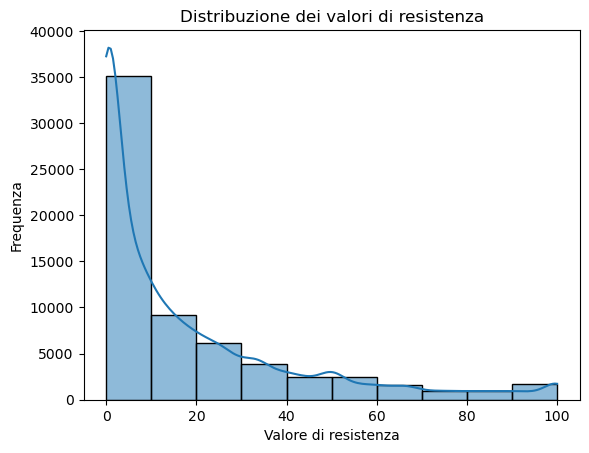

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea l'istogramma
sns.histplot(data['Value'], bins=10, kde=True)

# Personalizza l'istogramma
plt.title('Distribuzione dei valori di resistenza')
plt.xlabel('Valore di resistenza')
plt.ylabel('Frequenza')

# Mostra l'istogramma
plt.show()


### Visualizzazione della distribuzione dei valori di resistenza tra diverse categorie di batteri ('Bacteria') o tra diversi gruppi di antibiotici ('Antibiotic')

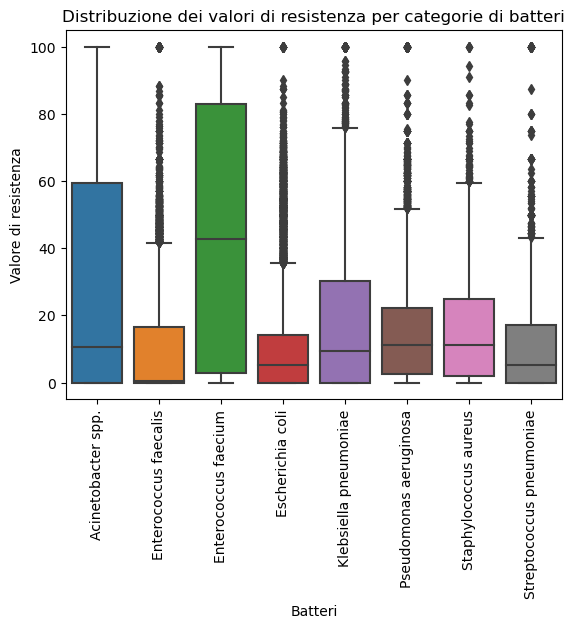

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un box plot per la distribuzione dei valori di resistenza tra diverse categorie di batteri
sns.boxplot(x='Bacteria', y='Value', data=data)
plt.xticks(rotation=90)  # Ruota le etichette sull'asse x, se necessario
plt.title('Distribuzione dei valori di resistenza per categorie di batteri')
plt.xlabel('Batteri')
plt.ylabel('Valore di resistenza')

# Mostra il box plot
plt.show()


### Confronto delle tendenze nei valori di resistenza nel tempo le tendenze in diverse regioni.

Confronto delle tendenze nel tempo per diversi gruppi di antibiotici:

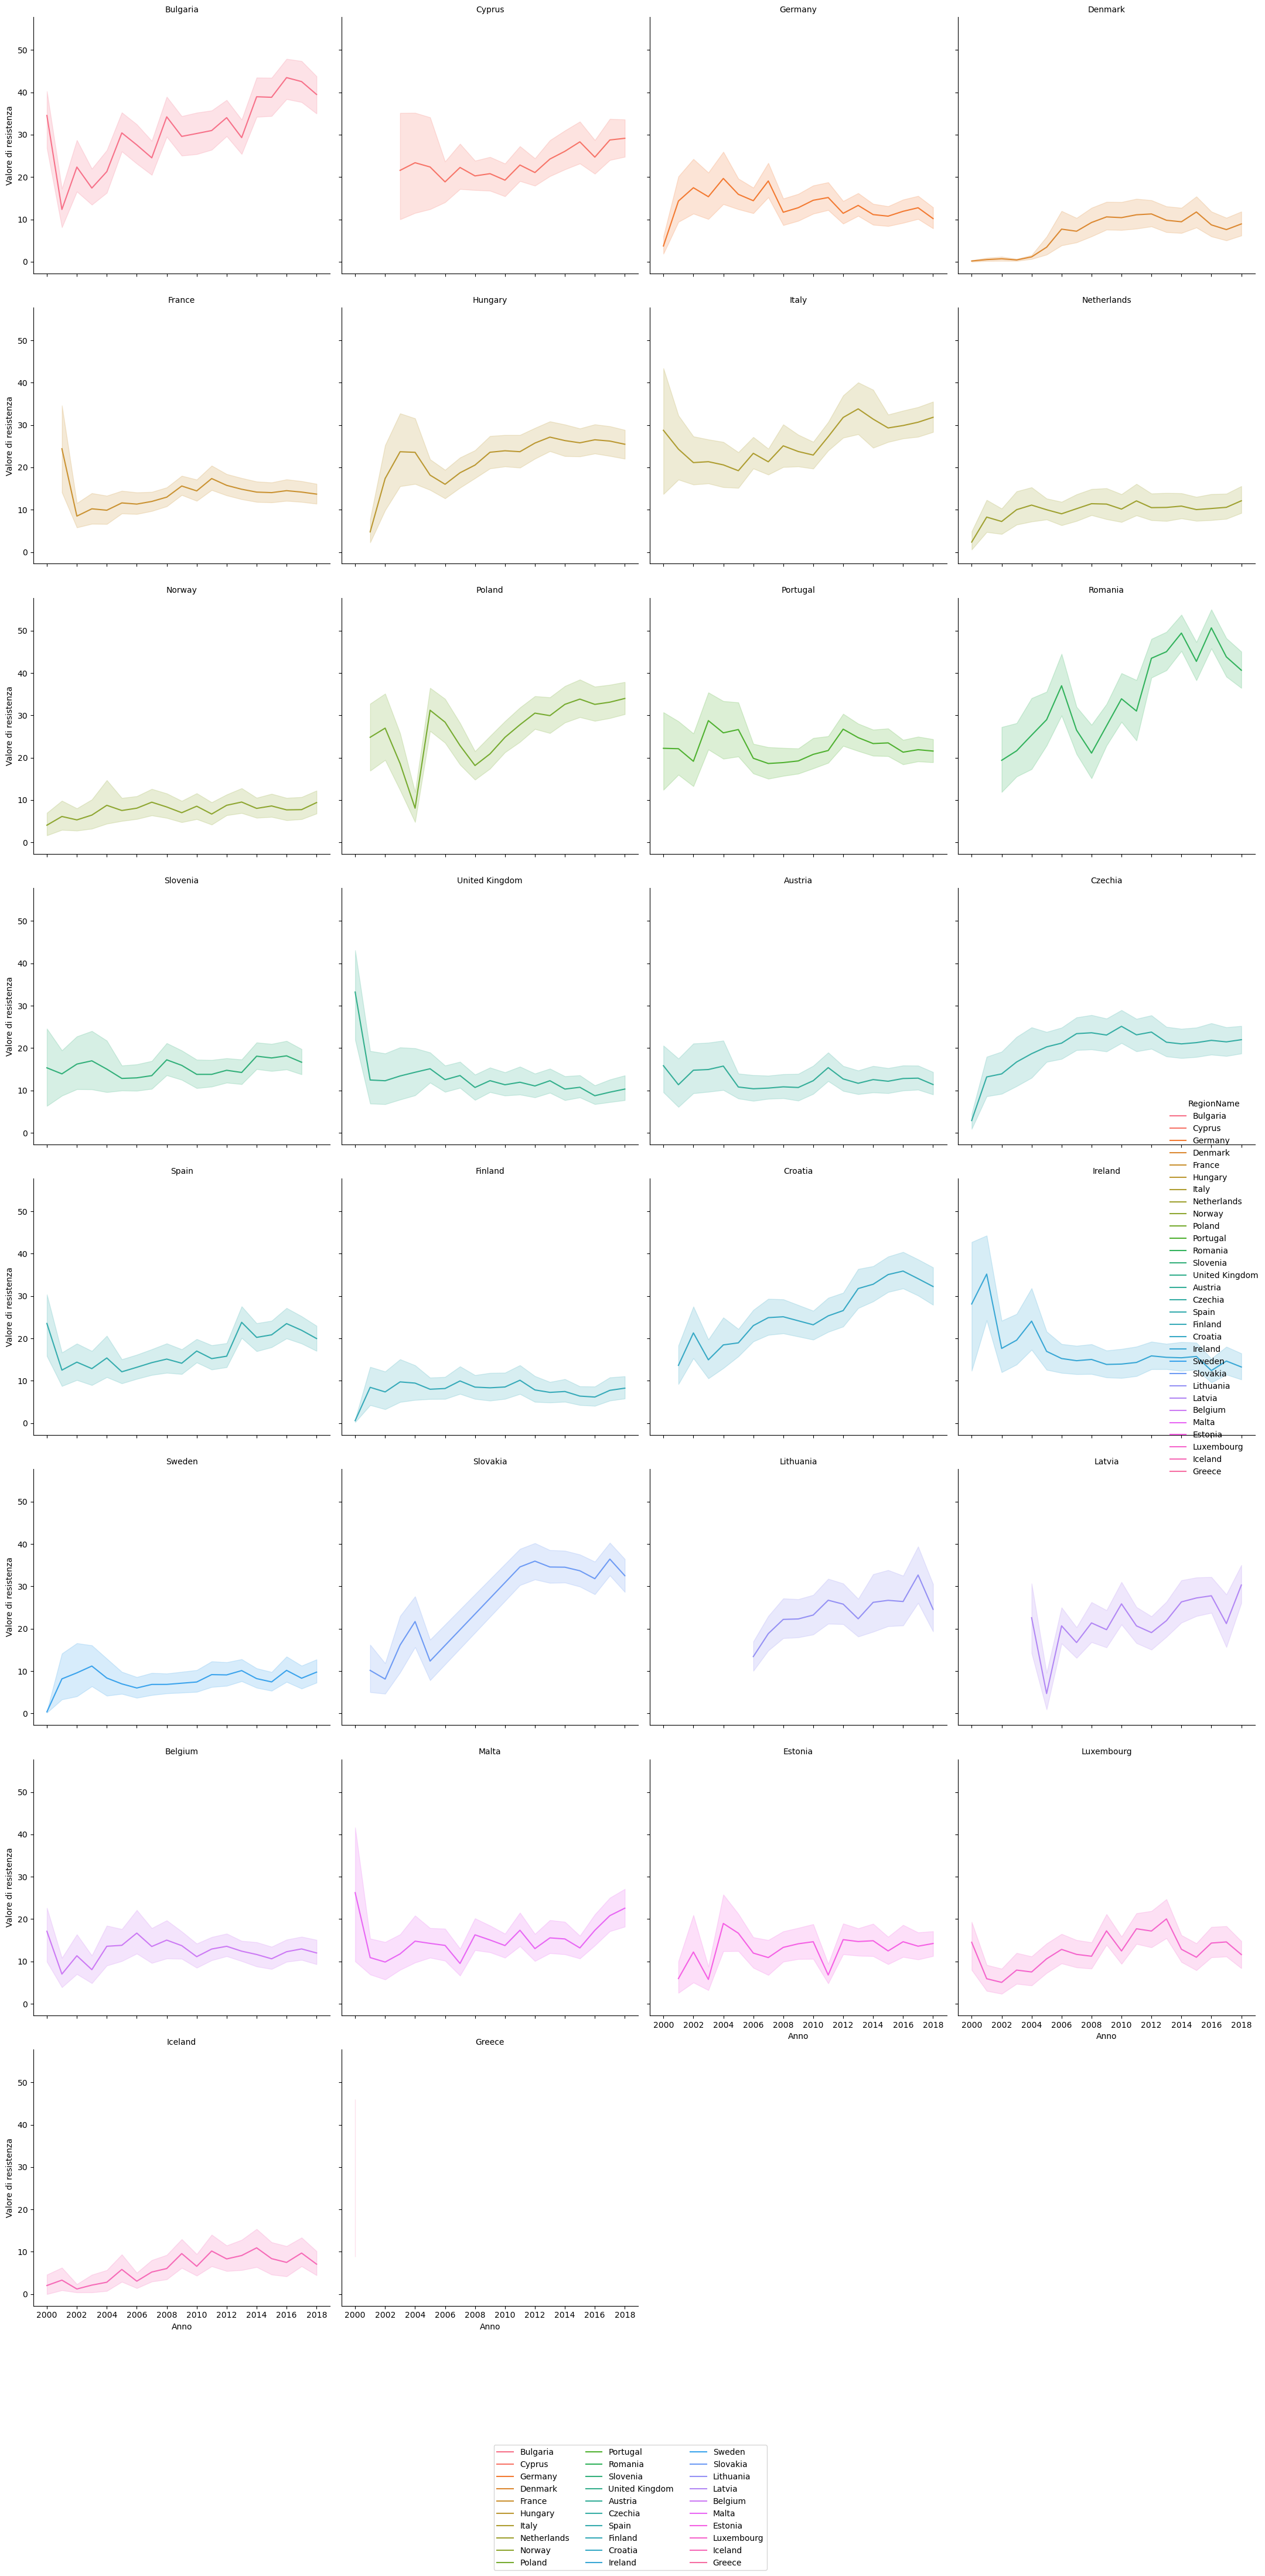

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un grafico faccetta per confrontare le tendenze in diverse regioni
g = sns.relplot(x='Time', y='Value', hue='RegionName', col='RegionName', col_wrap=4, kind='line', data=data)
g.set_titles('{col_name}')
g.set_axis_labels('Anno', 'Valore di resistenza')
plt.tight_layout()

# Sposta la legenda nella parte inferiore del riquadro
g.fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)  # Posiziona la legenda nella parte inferiore del riquadro

# Mostra i grafici faccetta con la legenda in basso
plt.show()

